# Exploratory Data Analysis

## REKT Database from DEFIYIELD

In [512]:
import pandas as pd             #pandas for using dataframe and reading csv file(s)
import json
import numpy as np              #numpy for vector operations and basic maths
import matplotlib.pyplot as plt #for plotting
%matplotlib inline              
import seaborn as sns           #for making plots
import math                     #for basic math operations
import warnings
# from pandas.plotting import parallel_coordinates #for multivariate plots
warnings.filterwarnings('ignore') #ignore deprecation warnings

In [513]:
#importing cleaned data

REKT_df = pd.read_csv("../../data/Clean Data/REKT_Database_Clean_Python.csv")


## Renaming Columns

In [514]:
REKT_df.rename(columns={"date": "attack_date", "funds_returned": "funds_returned_USD", "funds_lost":"funds_lost_USD"}, inplace=True)


## We shall Deal With Missing Values Later After Visualizing Data

## Univariate Analysis: Numerical Variables

In [515]:
# Numerical datatypes
REKT_df.select_dtypes(include=['int64','float64','Int64']).dtypes

Unnamed: 0                   int64
id                           int64
funds_lost_USD             float64
funds_returned_USD         float64
active                       int64
is_verified_source_code    float64
is_public_team             float64
month_of_attack            float64
day_of_week_of_attack      float64
day_of_year_of_attack      float64
dtype: object

In [516]:
# segregating variables into groups
funds = ['funds_lost_USD','funds_returned_USD']
attack_dates = ['day_of_week_of_attack','month_of_attack', 'day_of_year_of_attack']

### Moments of Funds variables

Text(0.5, 1.0, 'std_dev = (-1376646831.48, 1534964919.11); kurtosis = 739.08;\nskew = 26.95; range = (16.0, 40000000000.0, 39999999984.0)\nmean = 79159043.81; median = 351064.0')

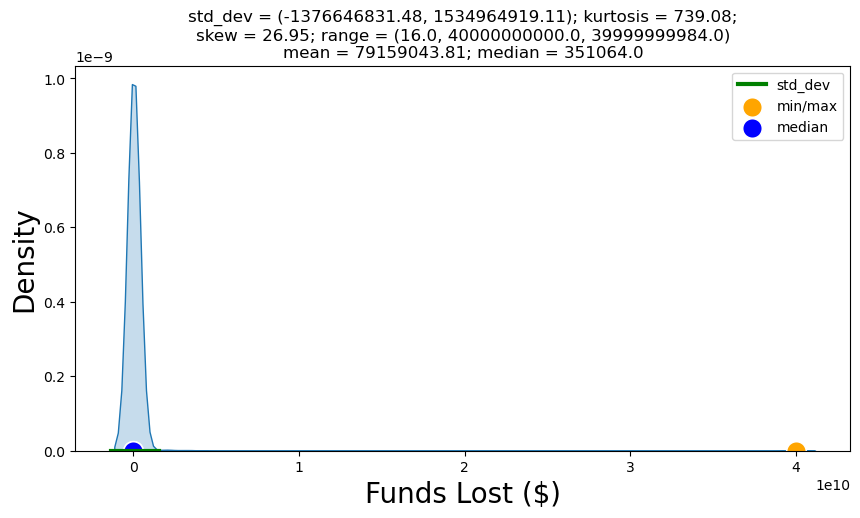

In [517]:
mini = REKT_df['funds_lost_USD'].min()
maxi = REKT_df['funds_lost_USD'].max()
ran = REKT_df['funds_lost_USD'].max()-REKT_df['funds_lost_USD'].min()
mean = REKT_df['funds_lost_USD'].mean()
median = REKT_df['funds_lost_USD'].median()
st_dev = REKT_df['funds_lost_USD'].std()
skew = REKT_df['funds_lost_USD'].skew()
kurt = REKT_df['funds_lost_USD'].kurtosis()

# calculating points of standard deviation

points = mean-st_dev, mean+st_dev

plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
sns.kdeplot(REKT_df['funds_lost_USD'], shade=True)
#sns.histplot(data=REKT_df, x='funds_lost_USD', kde=True, fill=False)
sns.lineplot(points, [0,0], color = 'green', label = "std_dev", lw=3)
sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max", s=200)
#sns.scatterplot([mean], [0], color = 'red', label = "mean", s=200)
sns.scatterplot([median], [0], color = 'blue', label = "median", s=200)
plt.xlabel('Funds Lost ($)', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                round(kurt,2),
                                                                                                round(skew,2),
                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                round(mean,2),
                                                                                                round(median,2)))


# plt.figure(figsize=(10,5))
# ax=sns.histplot(data=REKT_df, x='funds_lost_USD', kde=True, fill=False)
# plt.title('Histogram of Sales Price')
# # Set x-axis label
# plt.xlabel('Funds Lost in $')
# # Set y-axis label
# plt.ylabel('Count')
# # fig = ax.get_figure()
# # fig.savefig('images/lab-2.2_SalesPriceHistogram.pdf')
# # fig.savefig('images/lab-2.2_SalesPriceHistogram.jpg')

Text(0.5, 1.0, 'std_dev = (-75889182.62, 155116720.15); kurtosis = 14.79;\nskew = 3.82; range = (4440.0, 602189570.0, 602185130.0)\nmean = 39613768.77; median = 2758203.0')

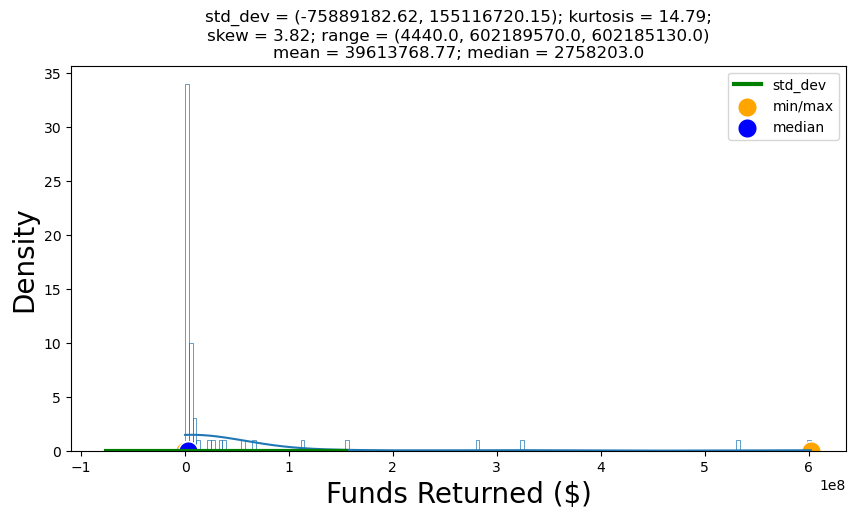

In [518]:
mini = REKT_df['funds_returned_USD'].min()
maxi = REKT_df['funds_returned_USD'].max()
ran = REKT_df['funds_returned_USD'].max()-REKT_df['funds_returned_USD'].min()
mean = REKT_df['funds_returned_USD'].mean()
median = REKT_df['funds_returned_USD'].median()
st_dev = REKT_df['funds_returned_USD'].std()
skew = REKT_df['funds_returned_USD'].skew()
kurt = REKT_df['funds_returned_USD'].kurtosis()

# calculating points of standard deviation

points = mean-st_dev, mean+st_dev

plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
#sns.kdeplot(REKT_df_log['log_funds_lost'], shade=True)
sns.histplot(data=REKT_df, x='funds_returned_USD', kde=True, fill=False)
sns.lineplot(points, [0,0], color = 'green', label = "std_dev", lw=3)
sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max", s=200)
#sns.scatterplot([mean], [0], color = 'red', label = "mean", s=200)
sns.scatterplot([median], [0], color = 'blue', label = "median", s=200)
plt.xlabel('Funds Returned ($)', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                round(kurt,2),
                                                                                                round(skew,2),
                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                round(mean,2),
                                                                                                round(median,2)))

# plt.figure(figsize=(10,5))
# ax=sns.histplot(data=REKT_df, x='funds_returned_USD', kde=True, fill=False)
# plt.title('Histogram of Funds Returned in $')
# # Set x-axis label
# plt.xlabel('Funds Returned in $')
# # Set y-axis label
# plt.ylabel('Count')

Text(0.5, 1.0, 'std_dev = (0.99, 1.6); kurtosis = 0.11;\nskew = 0.15; range = (0.28, 2.44, 2.16)\nmean = 1.29; median = 1.28')

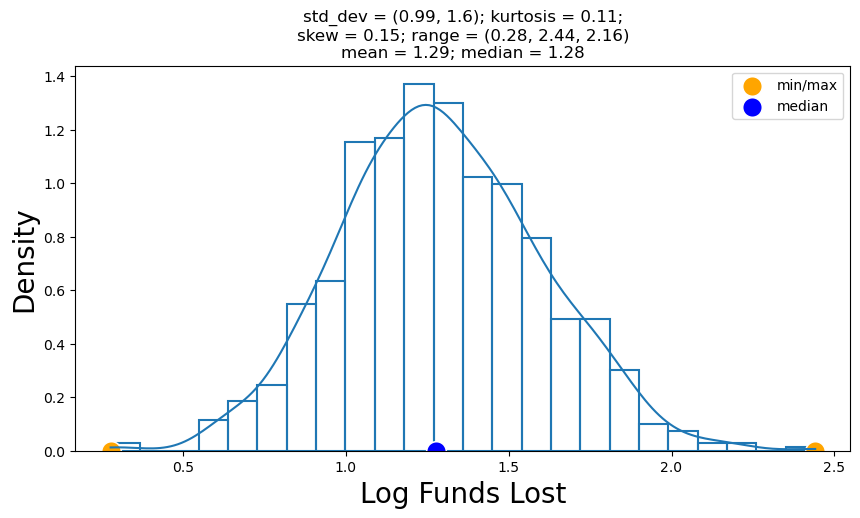

In [519]:
# create new data frame for log10 numerical variables

REKT_df_log = pd.DataFrame()
REKT_df_log['log_funds_lost'] = REKT_df['funds_lost_USD'].map(lambda x : np.log(x)/10)

mini = REKT_df_log['log_funds_lost'].min()
maxi = REKT_df_log['log_funds_lost'].max()
ran = REKT_df_log['log_funds_lost'].max()-REKT_df_log['log_funds_lost'].min()
mean = REKT_df_log['log_funds_lost'].mean()
median = REKT_df_log['log_funds_lost'].median()
st_dev = REKT_df_log['log_funds_lost'].std()
skew = REKT_df_log['log_funds_lost'].skew()
kurt = REKT_df_log['log_funds_lost'].kurtosis()

# calculating points of standard deviation

points = mean-st_dev, mean+st_dev

plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
#sns.kdeplot(REKT_df_log['log_funds_lost'], shade=True)
sns.histplot(data=REKT_df_log, x='log_funds_lost', kde=True, fill=False, stat = 'density')
#sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max", s=200)
#sns.scatterplot([mean], [0], color = 'red', label = "mean")
sns.scatterplot([median], [0], color = 'blue', label = "median", s=200)
plt.xlabel('Log Funds Lost', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                round(kurt,2),
                                                                                                round(skew,2),
                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                round(mean,2),
                                                                                                round(median,2)))
                                                                                           


# ax=sns.histplot(data=REKT_df_log, x='log_funds_lost', kde=True, fill=False)
# plt.title('Histogram of Log Funds Lost')
# # Set x-axis label
# plt.xlabel('Log Funds Lost')
# # Set y-axis label
# plt.ylabel('Count')

log normal dist -> knew it 

Text(0.5, 1.0, 'std_dev = (1.23, 1.73); kurtosis = 0.23;\nskew = 0.07; range = (0.84, 2.02, 1.18)\nmean = 1.48; median = 1.48')

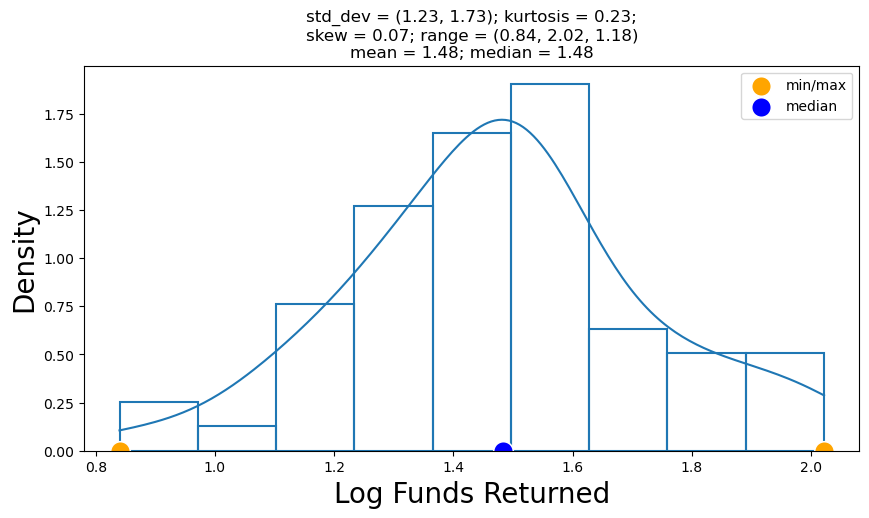

In [520]:
REKT_df_log['log_funds_returned'] = REKT_df['funds_returned_USD'].map(lambda x : np.log(x)/10)

mini = REKT_df_log['log_funds_returned'].min()
maxi = REKT_df_log['log_funds_returned'].max()
ran = REKT_df_log['log_funds_returned'].max()-REKT_df_log['log_funds_returned'].min()
mean = REKT_df_log['log_funds_returned'].mean()
median = REKT_df_log['log_funds_returned'].median()
st_dev = REKT_df_log['log_funds_returned'].std()
skew = REKT_df_log['log_funds_returned'].skew()
kurt = REKT_df_log['log_funds_returned'].kurtosis()

# calculating points of standard deviation

points = mean-st_dev, mean+st_dev

plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
#sns.kdeplot(REKT_df_log['log_funds_lost'], shade=True)
sns.histplot(data=REKT_df_log, x='log_funds_returned', kde=True, fill=False, stat = 'density')
#sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max", s=200)
#sns.scatterplot([mean], [0], color = 'red', label = "mean")
sns.scatterplot([median], [0], color = 'blue', label = "median", s=200)
plt.xlabel('Log Funds Returned', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                round(kurt,2),
                                                                                                round(skew,2),
                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                round(mean,2),
                                                                                                round(median,2)))

# plt.figure(figsize=(10,5))
# ax=sns.histplot(data=REKT_df_log, x='log_funds_returned', kde=True, fill=False)
# plt.title('Histogram of Log Funds Returned')
# # Set x-axis label
# plt.xlabel('Log Funds Returned')
# # Set y-axis label
# plt.ylabel('Count')

### Moments of Date variables

Text(0.5, 1.0, 'std_dev = (0.62, 4.52); kurtosis = -1.12;\nskew = 0.23; range = (0.0, 6.0, 6.0)\nmean = 2.57; median = 3.0')

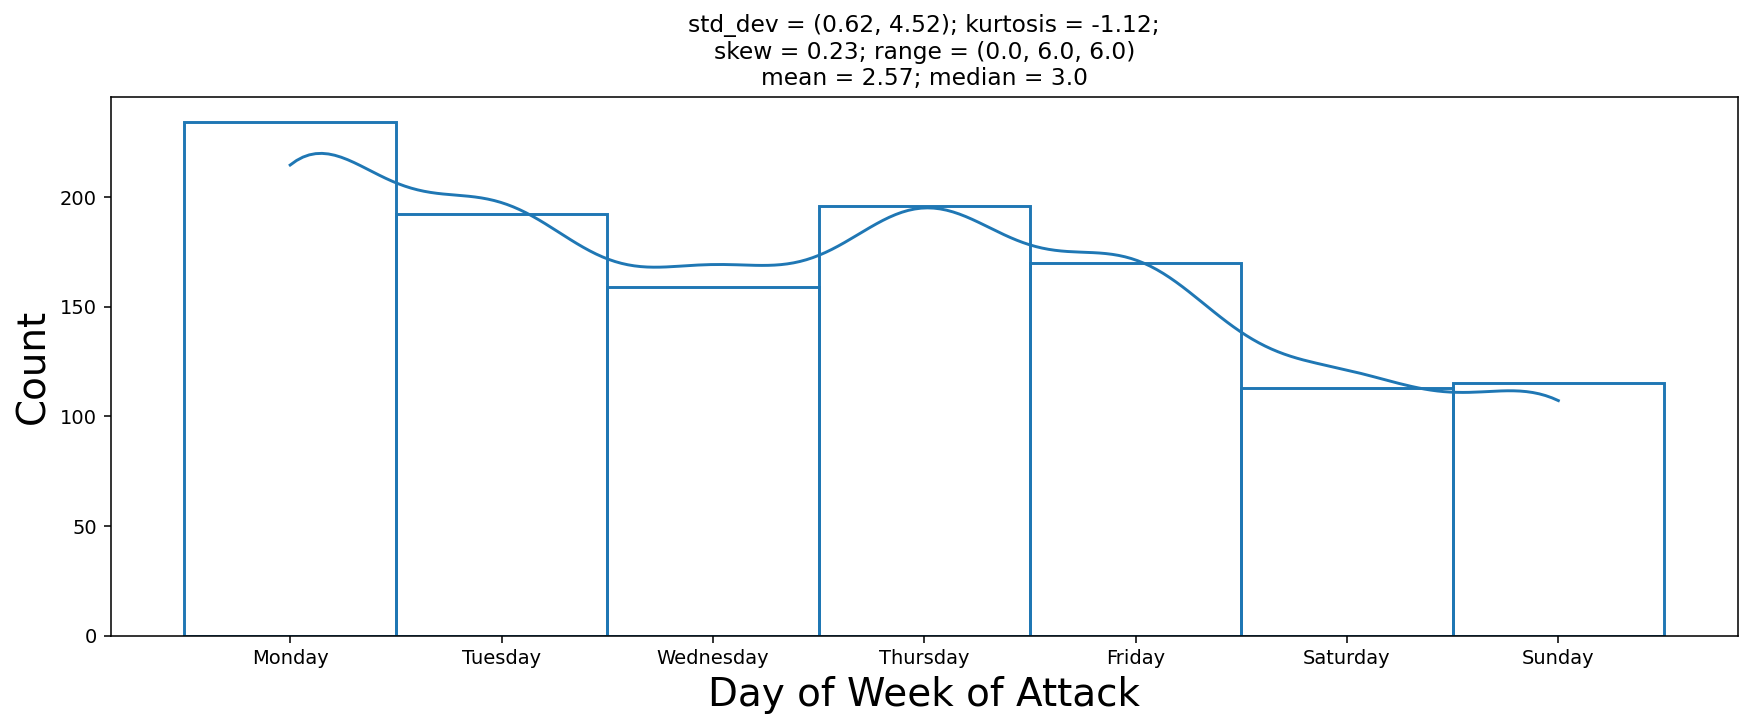

In [500]:
mini = REKT_df['day_of_week_of_attack'].min()
maxi = REKT_df['day_of_week_of_attack'].max()
ran = REKT_df['day_of_week_of_attack'].max()-REKT_df['day_of_week_of_attack'].min()
mean = REKT_df['day_of_week_of_attack'].mean()
median = REKT_df['day_of_week_of_attack'].median()
st_dev = REKT_df['day_of_week_of_attack'].std()
skew = REKT_df['day_of_week_of_attack'].skew()
kurt = REKT_df['day_of_week_of_attack'].kurtosis()

REKT_df['day_name_attack'] = REKT_df.attack_date.dt.day_name() # used for xticks in plotting
REKT_df['day_name_attack'] = pd.Categorical(REKT_df['day_name_attack'], ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])

# calculating points of standard deviation

points = mean-st_dev, mean+st_dev

plt.figure(figsize=(15,5), dpi=140)

plt.subplot(1,1,1)
#sns.kdeplot(REKT_df['day_of_week_of_attack'], shade=True)
sns.histplot(data=REKT_df, x='day_name_attack', kde=True, fill=False)
#sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
##sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
#sns.scatterplot([mean], [0], color = 'red', label = "mean")
#sns.scatterplot([median], [0], color = 'blue', label = "median")
plt.xlabel('{}'.format('Day of Week of Attack'), fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                round(kurt,2),
                                                                                                round(skew,2),
                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                round(mean,2),
                                                                                                round(median,2)))

Text(0.5, 1.0, 'std_dev = (111.66, 302.67); kurtosis = -0.61;\nskew = -0.56; range = (1.0, 366.0, 365.0)\nmean = 207.17; median = 239.0')

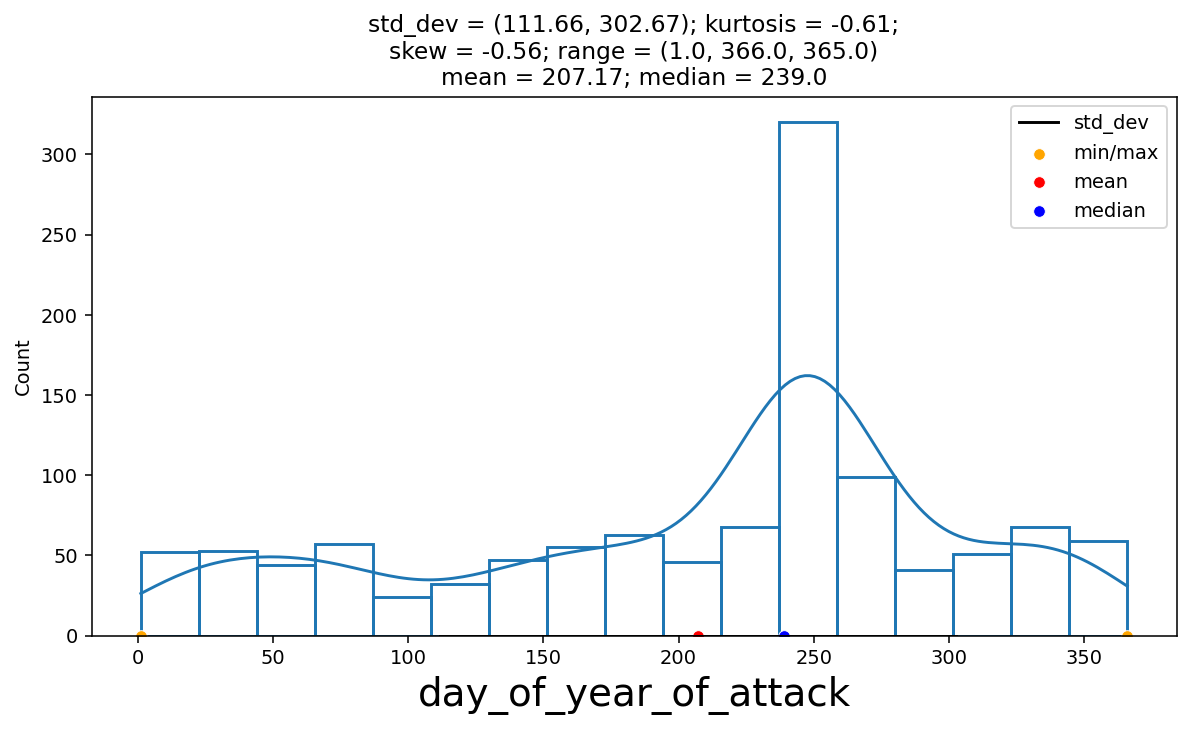

In [499]:
mini = REKT_df['day_of_year_of_attack'].min()
maxi = REKT_df['day_of_year_of_attack'].max()
ran = REKT_df['day_of_year_of_attack'].max()-REKT_df['day_of_year_of_attack'].min()
mean = REKT_df['day_of_year_of_attack'].mean()
median = REKT_df['day_of_year_of_attack'].median()
st_dev = REKT_df['day_of_year_of_attack'].std()
skew = REKT_df['day_of_year_of_attack'].skew()
kurt = REKT_df['day_of_year_of_attack'].kurtosis()

# calculating points of standard deviation

points = mean-st_dev, mean+st_dev

plt.figure(figsize=(10,5), dpi=140)

plt.subplot(1,1,1)
#sns.kdeplot(REKT_df_log['log_funds_lost'], shade=True)
sns.histplot(data=REKT_df, x='day_of_year_of_attack', kde=True, fill=False)
#sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
#sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
#sns.scatterplot([mean], [0], color = 'red', label = "mean")
#sns.scatterplot([median], [0], color = 'blue', label = "median")
plt.xlabel('{}'.format('day_of_year_of_attack'), fontsize = 20)
plt.ylabel('Count')
plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                round(kurt,2),
                                                                                                round(skew,2),
                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                round(mean,2),
                                                                                                round(median,2)))

association with s&p500 (3rd q end, 4th q start) - worst end of sept. steal before drop

Text(0.5, 1.0, 'std_dev = (4.19, 10.41); kurtosis = -0.61;\nskew = -0.55; range = (1.0, 12.0, 11.0)\nmean = 7.3; median = 8.0')

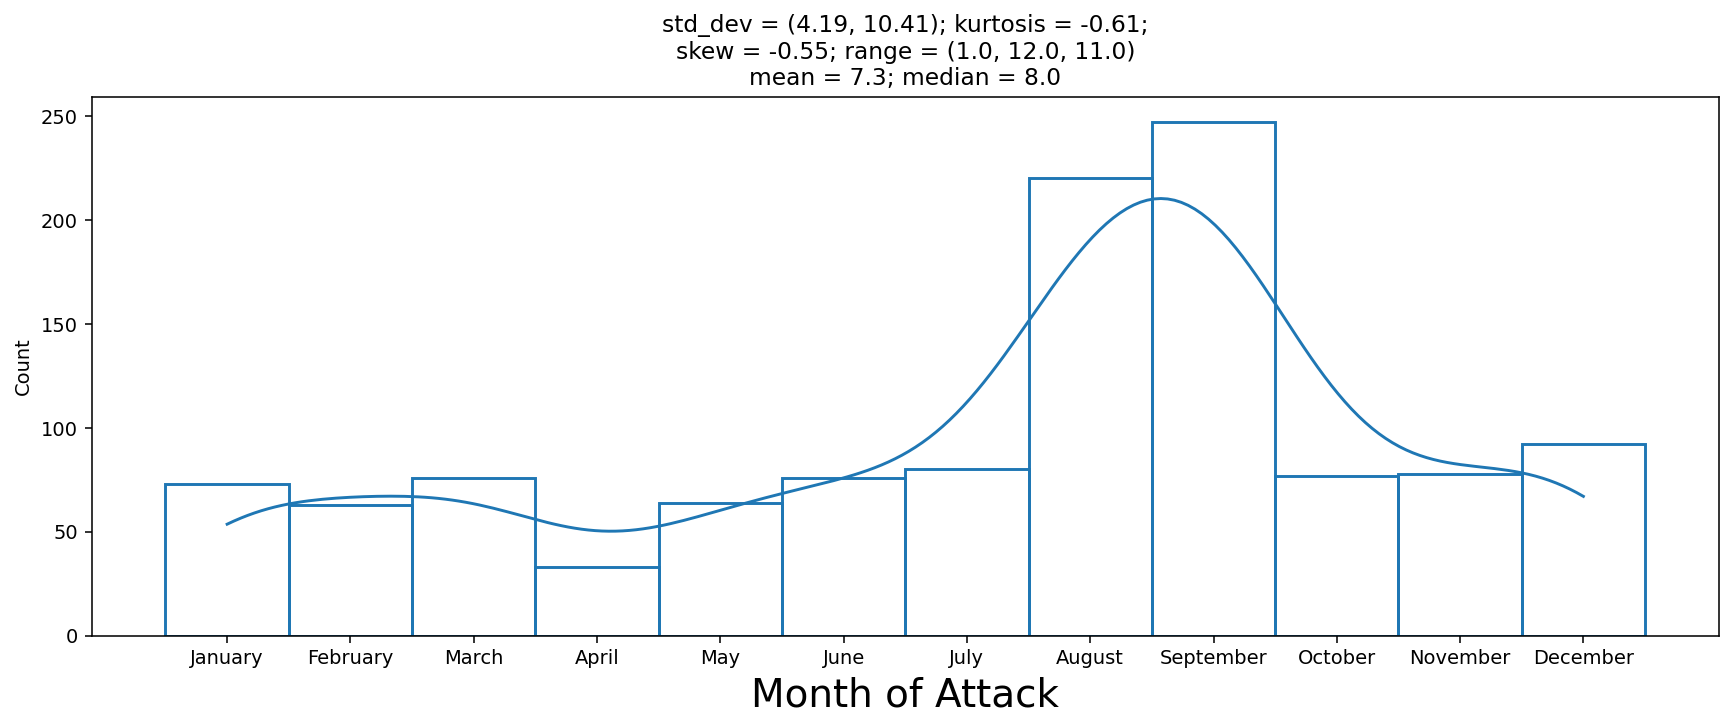

In [498]:
mini = REKT_df['month_of_attack'].min()
maxi = REKT_df['month_of_attack'].max()
ran = REKT_df['month_of_attack'].max()-REKT_df['month_of_attack'].min()
mean = REKT_df['month_of_attack'].mean()
median = REKT_df['month_of_attack'].median()
st_dev = REKT_df['month_of_attack'].std()
skew = REKT_df['month_of_attack'].skew()
kurt = REKT_df['month_of_attack'].kurtosis()

# calculating points of standard deviation

points = mean-st_dev, mean+st_dev

REKT_df['month_name_attack'] = REKT_df.attack_date.dt.month_name() # used for xticks in plotting
REKT_df['month_name_attack'] = pd.Categorical(REKT_df['month_name_attack'], ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


plt.figure(figsize=(15,5), dpi=140)

plt.subplot(1,1,1)
#sns.kdeplot(REKT_df_log['log_funds_lost'], shade=True)
sns.histplot(data=REKT_df, x='month_name_attack', kde=True, fill=False)
#sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
#sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
#sns.scatterplot([mean], [0], color = 'red', label = "mean")
#sns.scatterplot([median], [0], color = 'blue', label = "median")
#median - easier for categ vars
plt.xlabel('{}'.format('Month of Attack'), fontsize = 20)
plt.ylabel('Count')
plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                round(kurt,2),
                                                                                                round(skew,2),
                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                round(mean,2),
                                                                                                round(median,2)))

## Univariate Analysis : Categorical Variables

In [433]:
REKT_df.select_dtypes(exclude=['int64','float64','Int64', 'datetime64[ns]']).dtypes

id                           object
project_name                 object
description                  object
name_categories              object
token_name                   object
token_address                object
proof_link                   object
webarchive_link              object
active                     category
is_verified_source_code    category
is_public_team             category
scam_type                    object
network                      object
scamNetworks                 object
auditedBy                    object
dtype: object

In [521]:
# Custom function for easy visualisation of Categorical Variables
def UVA_variable(data, var):

  '''
  Univariate_Analysis_categorical
  takes a categorical variable and plots/prints all the value_counts and a barplot.
  '''
  # setting figure_size
  size = len(var)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var):
    norm_count = data[i].value_counts()
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('Count', fontsize = 20)
    plt.ylabel('Scam Type', fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### Analyzing scam_type variable

**Before we analyze this variable, we shall extract the dictionary values from scam_type variable and assign them to a new dataframe**

In [429]:
REKT_df_scam = pd.DataFrame()

REKT_df_scam['scam_type_dict']=[d.get('type') for d in REKT_df.scam_type]
REKT_df_scam['scam_type_dict'].head()

0     Bank Run
1    Exit Scam
2    Exit Scam
3    Exit Scam
4    Exit Scam
Name: scam_type_dict, dtype: object

In [452]:
REKT_df_scam['scam_type_dict'].nunique()

14

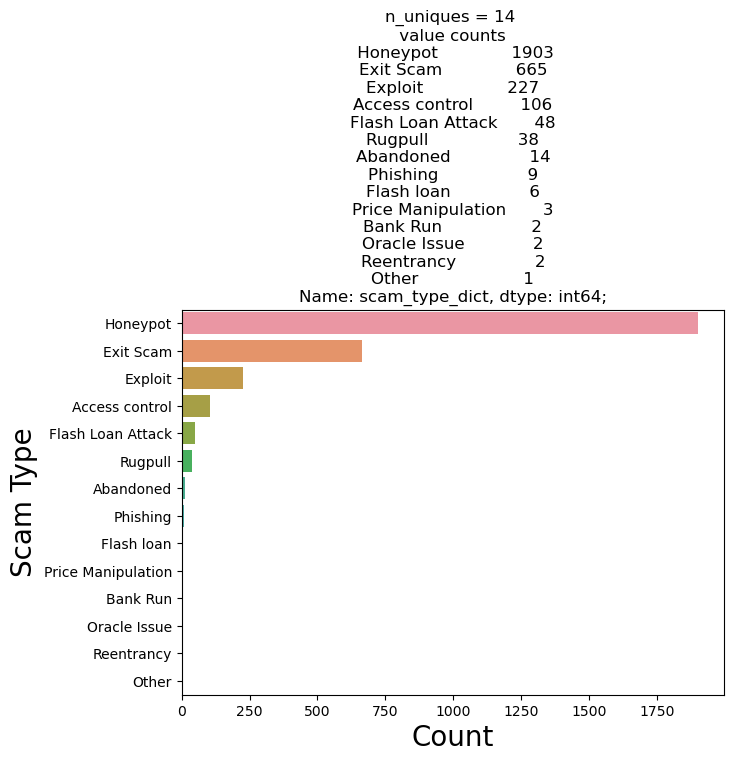

In [522]:
UVA_variable(REKT_df_scam, ['scam_type_dict'])

changes in scam -> %age that rturn most value in funds lost

% impact of scam over return and steal value (y variable)

## Univariate: Missing Values

In [434]:
REKT_df.isna().sum()

id                            0
project_name                  0
description                 285
name_categories             770
token_name                  194
token_address               209
attack_date                1876
proof_link                  190
webarchive_link            2830
funds_lost_USD             2286
funds_returned_USD         2995
active                        0
is_verified_source_code    2513
is_public_team             2513
scam_type                     0
network                       0
scamNetworks                  0
auditedBy                     0
month_of_attack            1876
day_of_week_of_attack      1876
day_of_year_of_attack      1876
dtype: int64

## Univariate Analysis: Outliers 

In [503]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it 

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables
  include_outlier : {bool} whether to include outliers or not, default = True
  '''

  size = len(var_group)
  plt.figure(figsize = (10*size,8), dpi = 200)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nOutlier (low/high) = {} \n'.format((outlier_low,outlier_high)))
                                                                                                   
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      quant25 = data2[i].quantile(0.25)
      quant75 = data2[i].quantile(0.75)
      IQR = quant75 - quant25
      med = data2[i].median()
      whis_low = med-(1.5*IQR)
      whis_high = med+(1.5*IQR)
      outlier_high = len(data2[i][data2[i]>whis_high])
      outlier_low = len(data2[i][data2[i]<whis_low])
    
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n'.format(round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2))
                                                                                                   ))

### funds

True


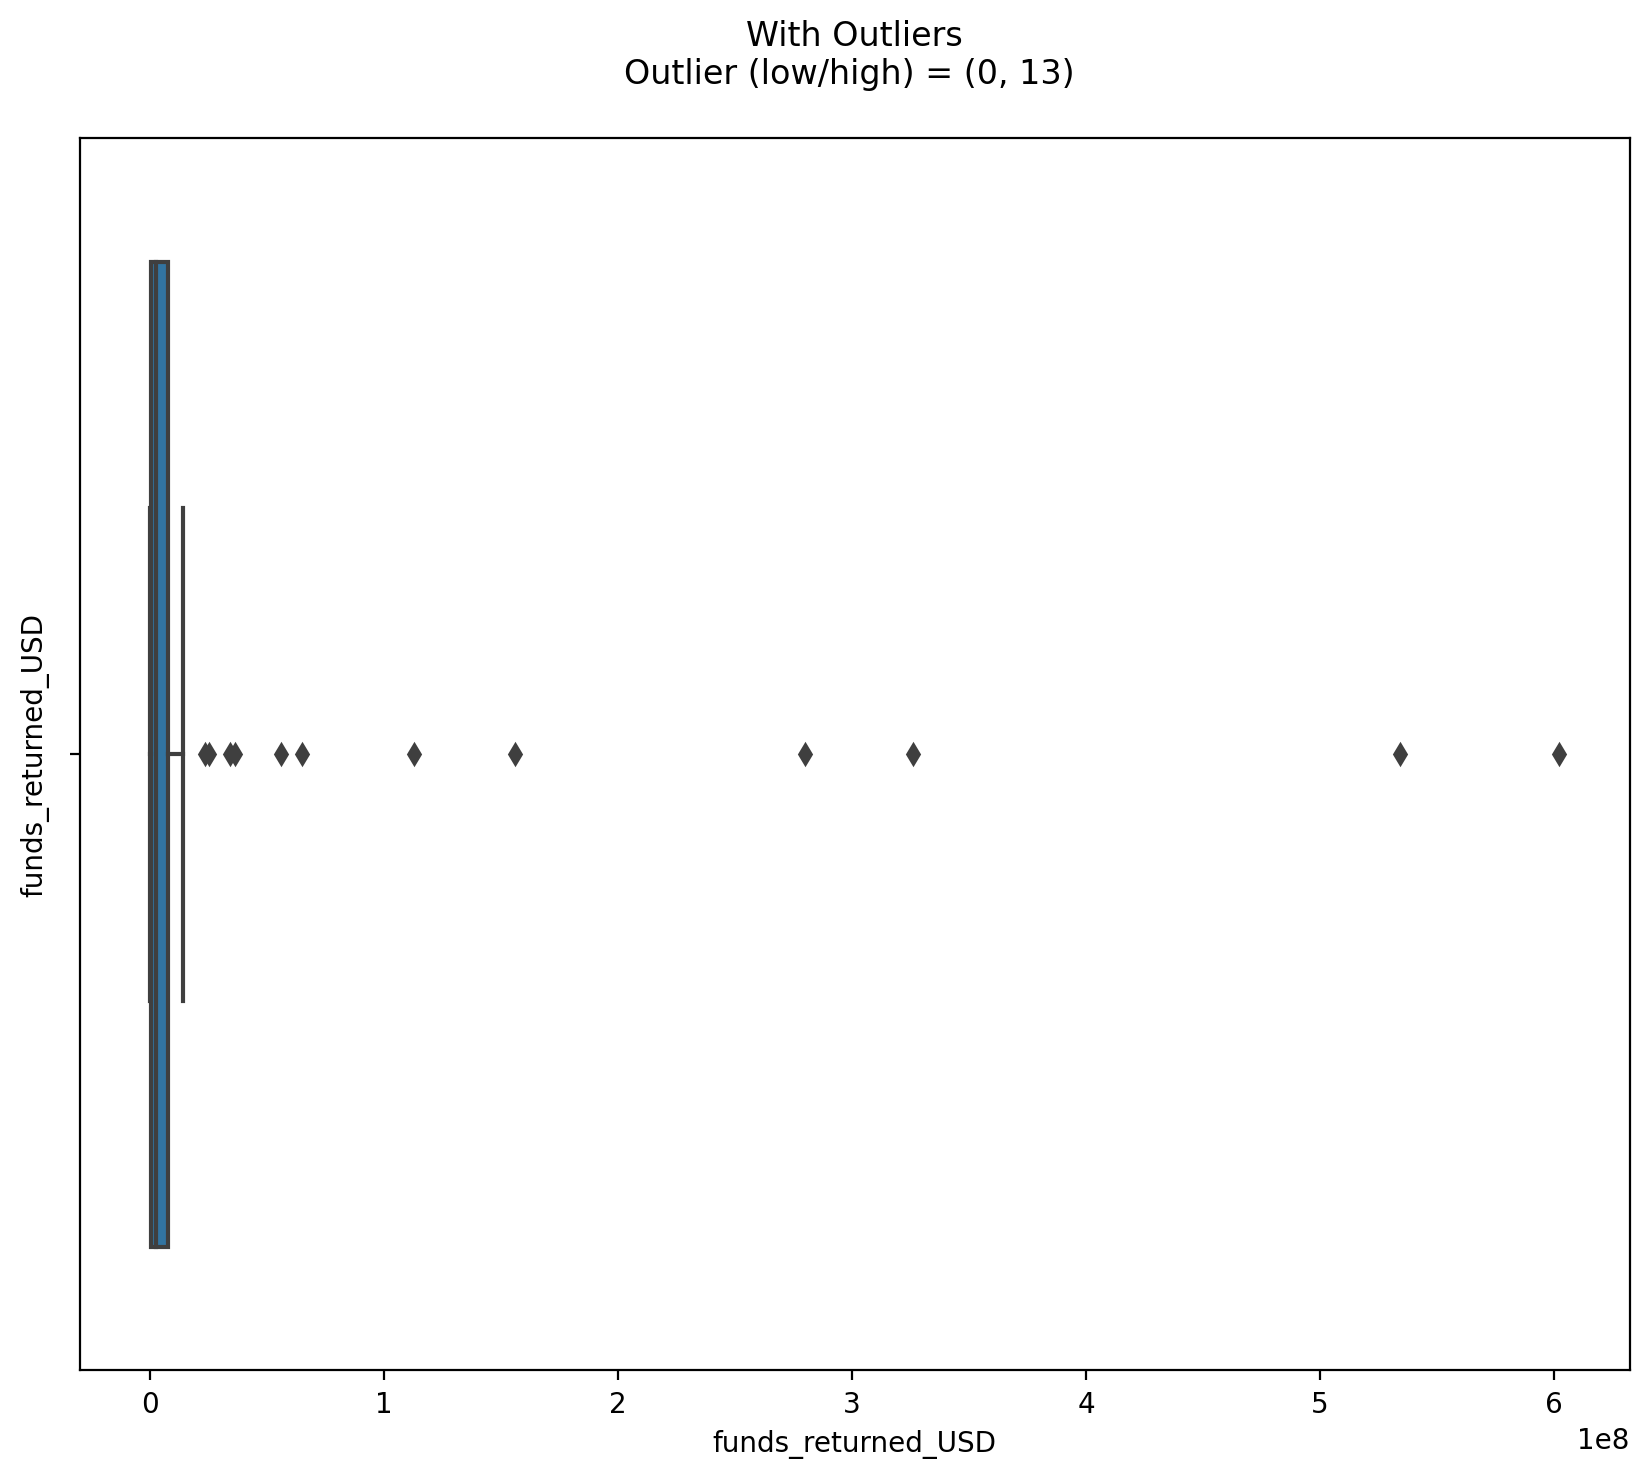

In [504]:
UVA_outlier(REKT_df, ['funds_returned_USD'],) 

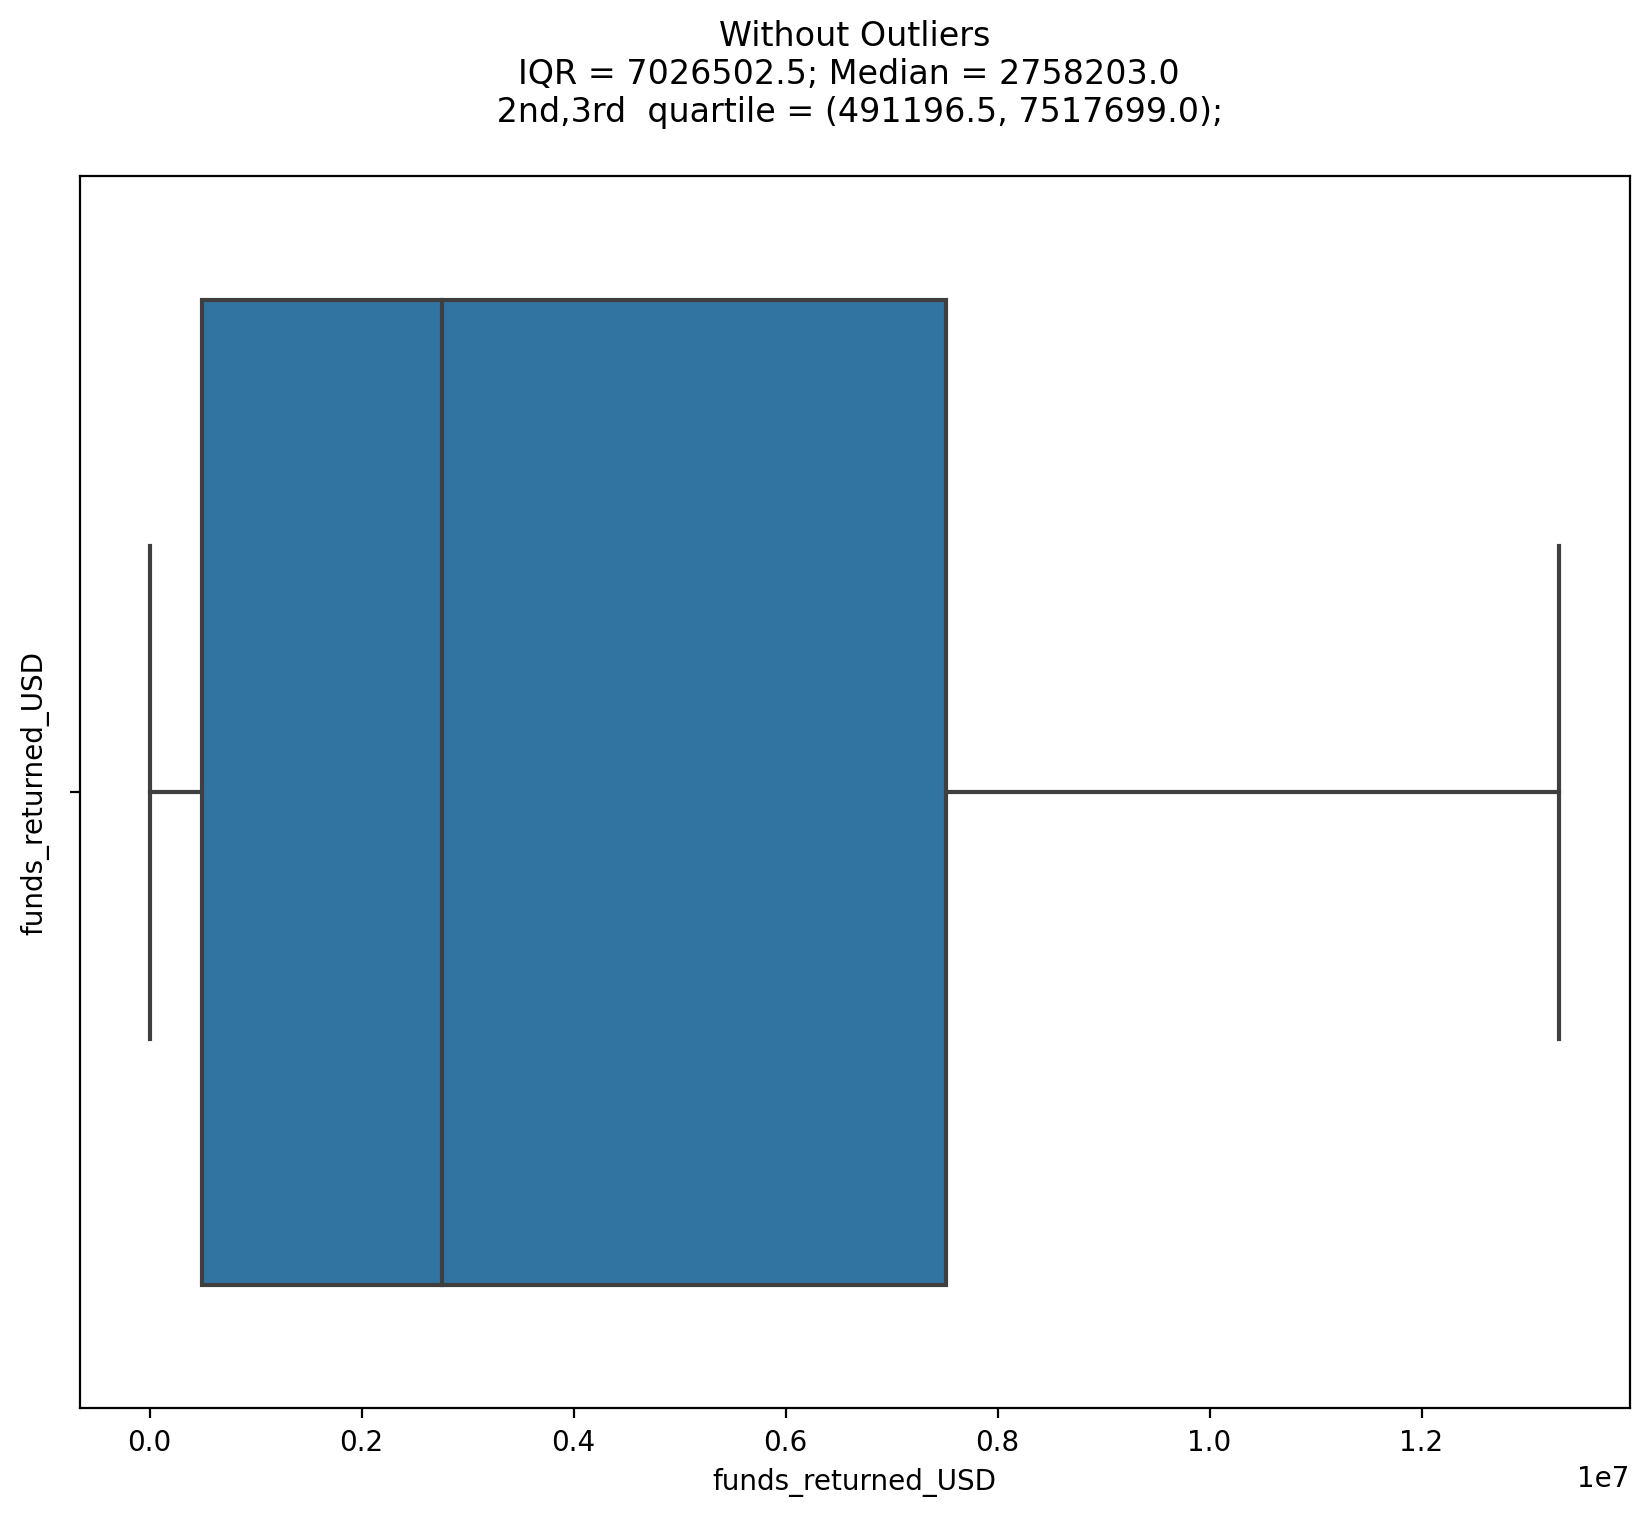

In [505]:
UVA_outlier(REKT_df, ['funds_returned_USD'],include_outlier=False) 

True


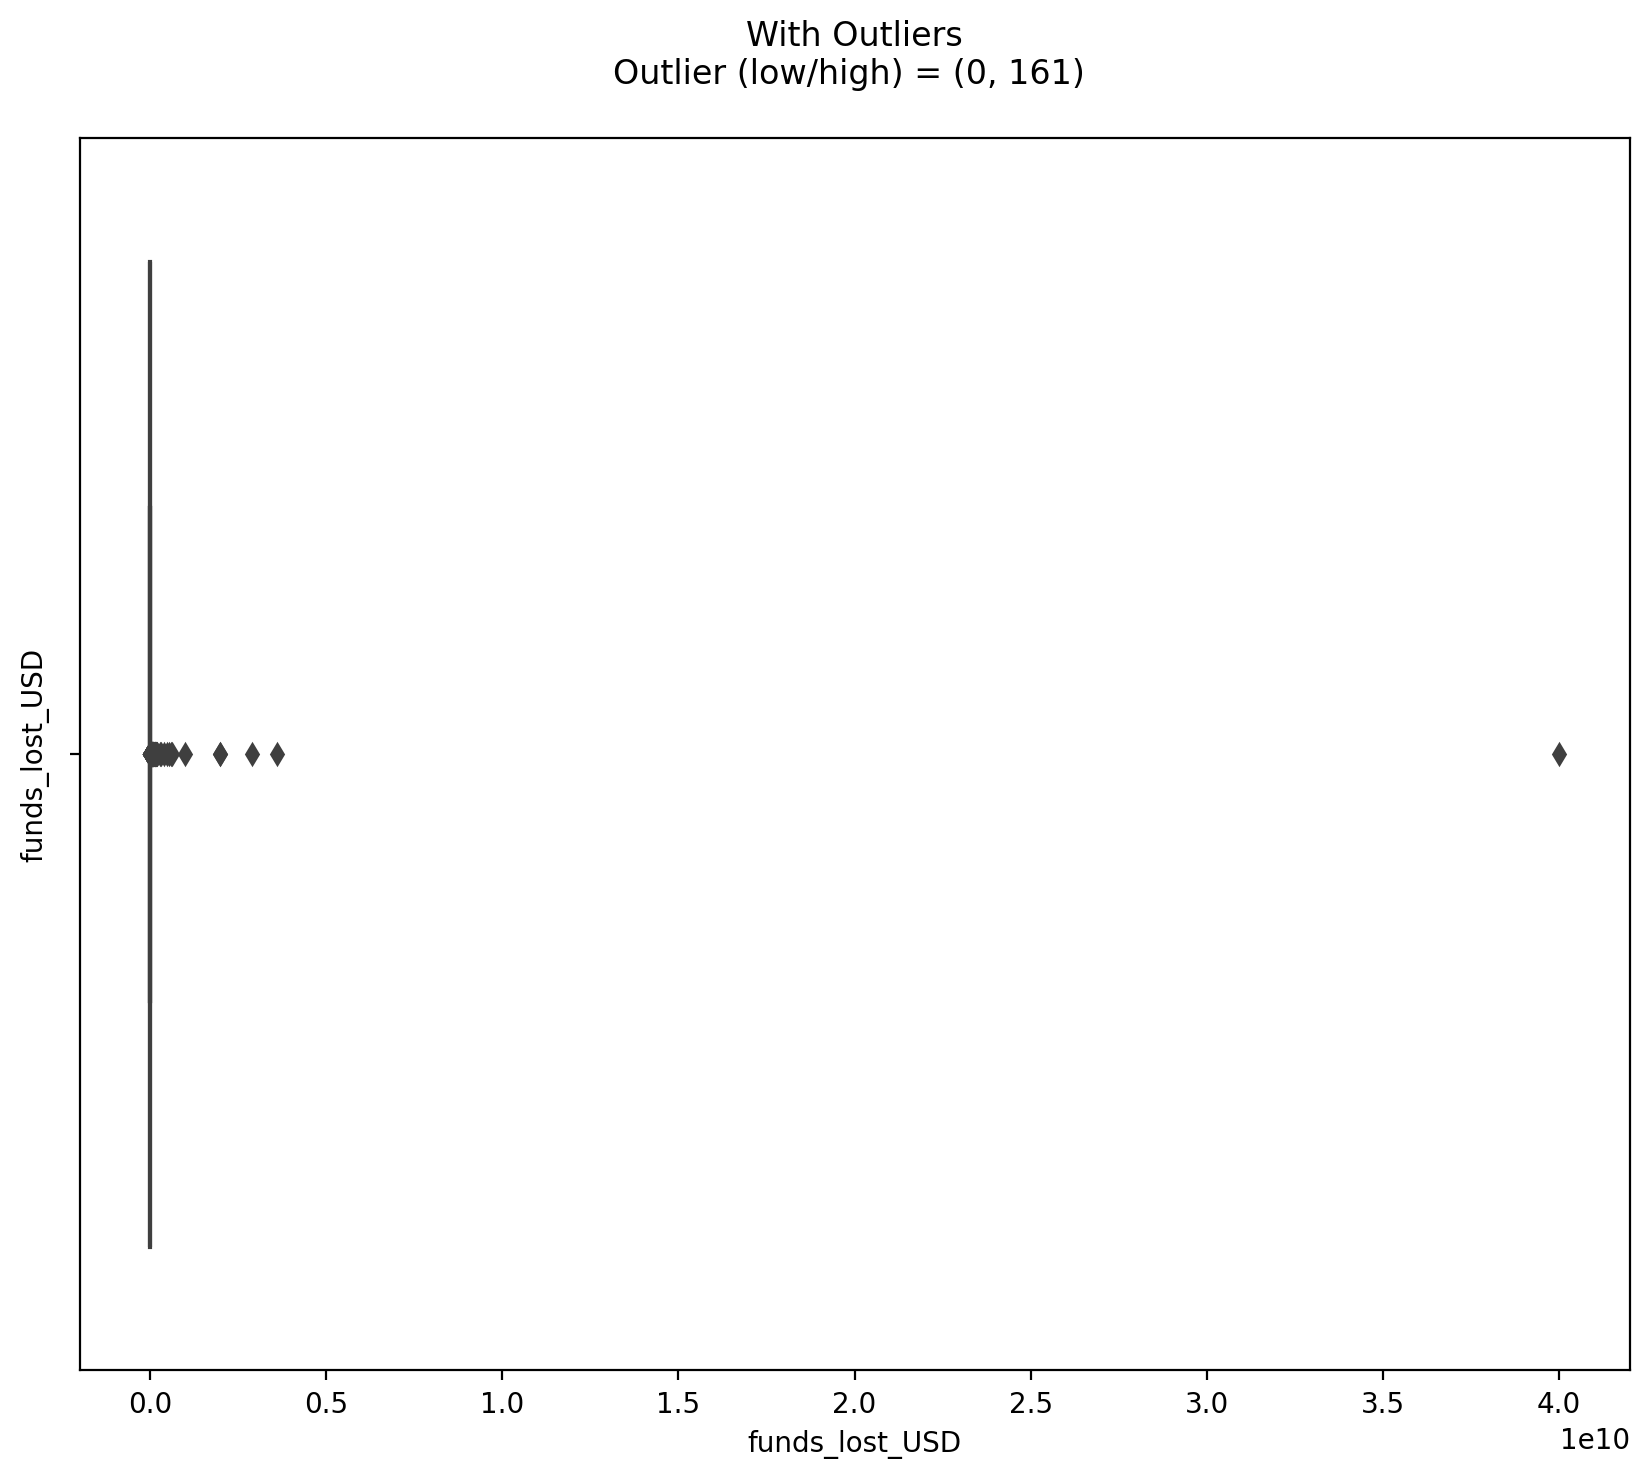

In [506]:
UVA_outlier(REKT_df, ['funds_lost_USD'],) 

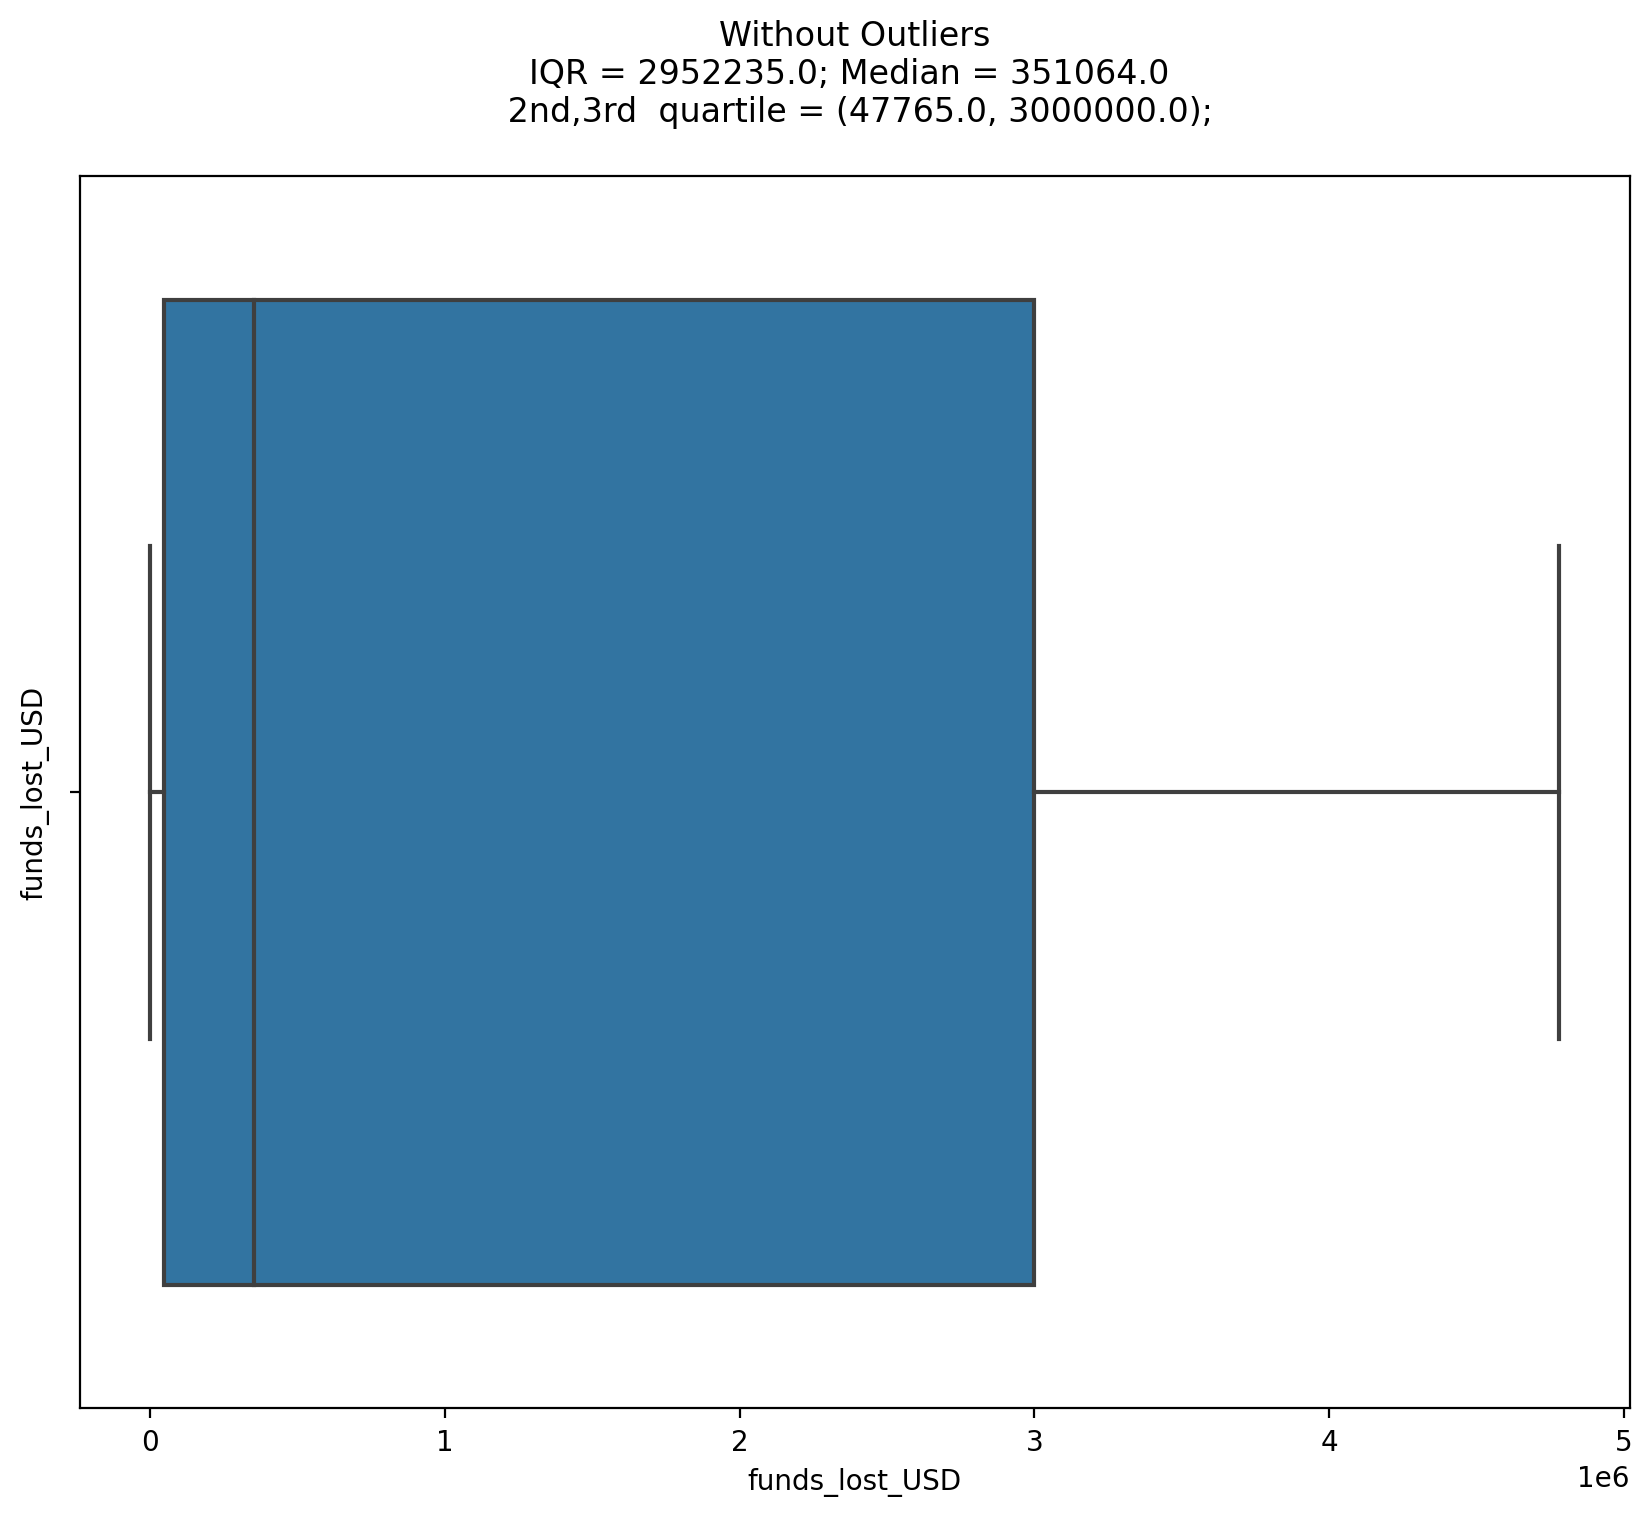

In [507]:
UVA_outlier(REKT_df, ['funds_lost_USD'],include_outlier=False) 

### Attack_Date

True
True
True


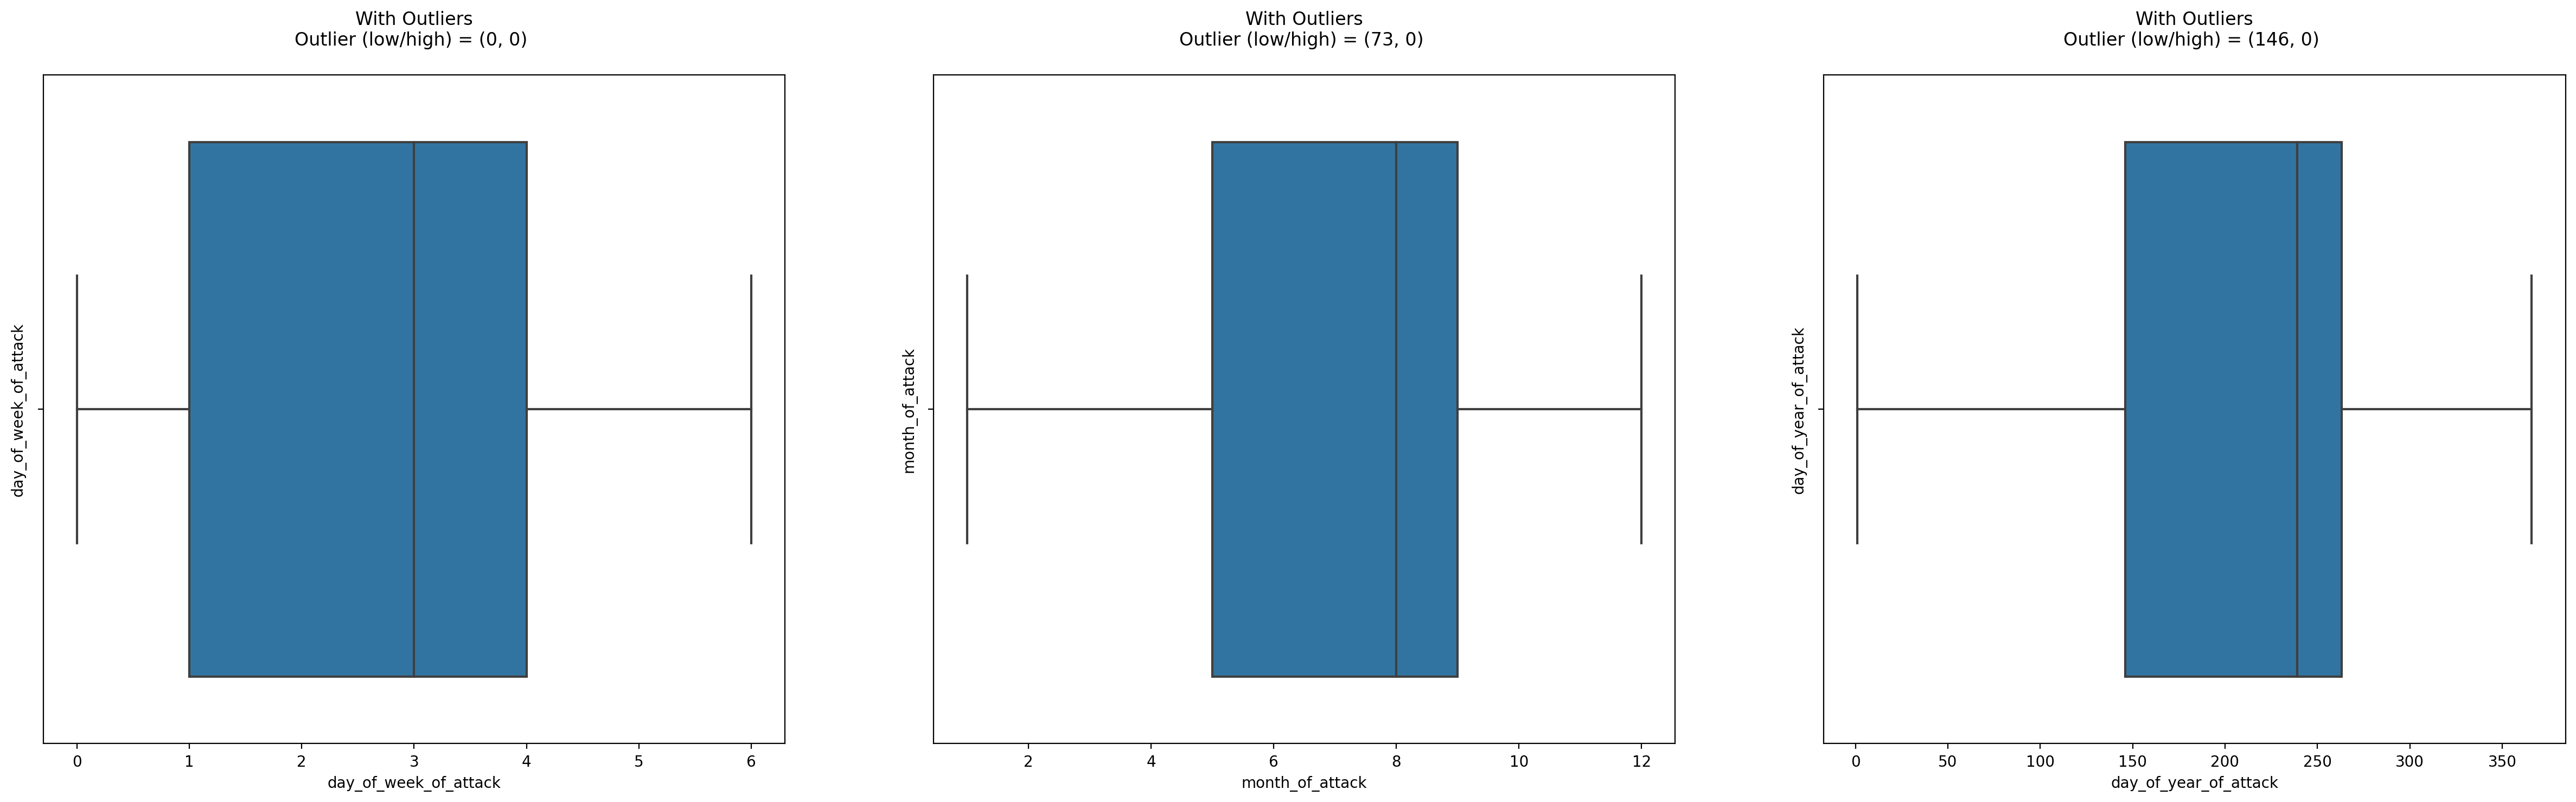

In [508]:
UVA_outlier(REKT_df, ['day_of_week_of_attack','month_of_attack', 'day_of_year_of_attack'])

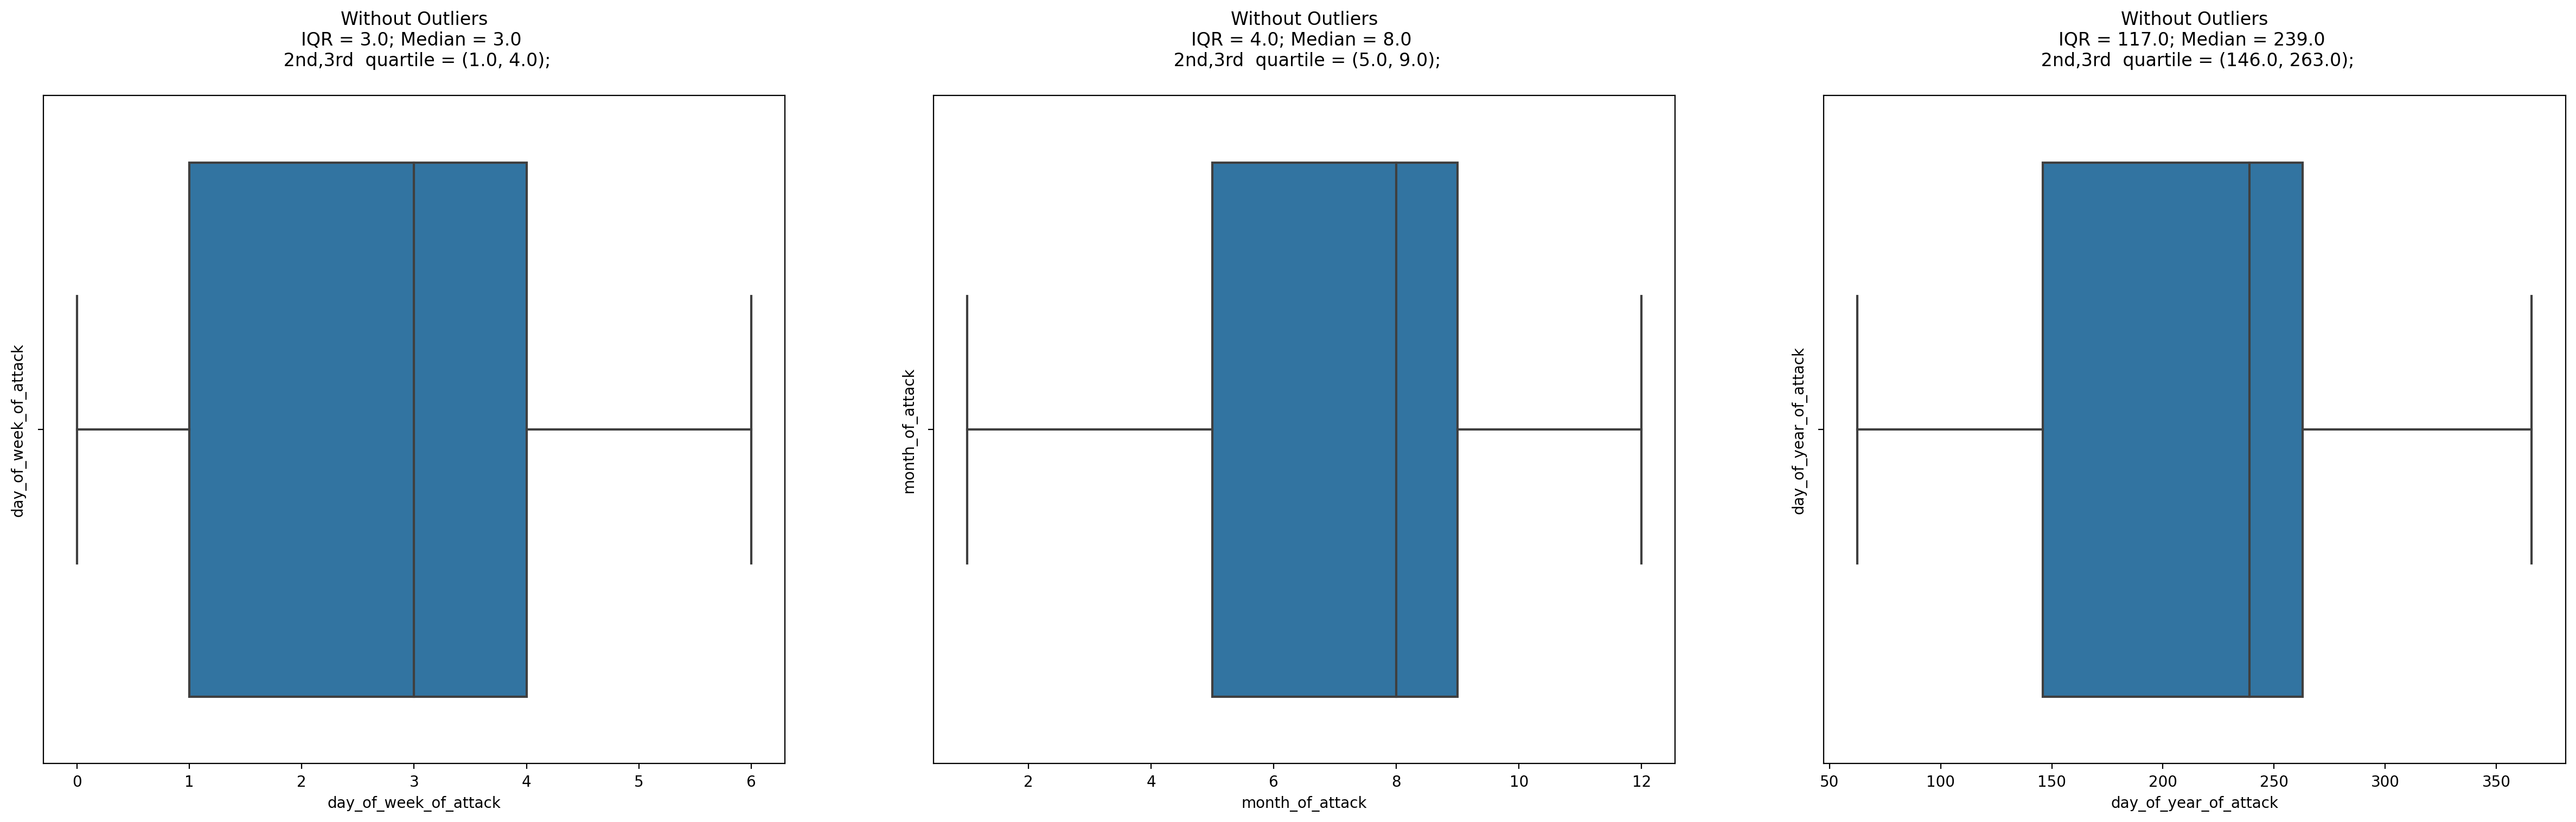

In [509]:
UVA_outlier(REKT_df, ['day_of_week_of_attack','month_of_attack', 'day_of_year_of_attack'], include_outlier=False) 

## Bivariate Analysis : Numerical-Numerical

In [436]:
# isolating numerical datatypes
numerical = REKT_df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

funds_lost_USD           float64
funds_returned_USD       float64
month_of_attack          float64
day_of_week_of_attack    float64
day_of_year_of_attack    float64
dtype: object

In [437]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,funds_lost_USD,funds_returned_USD,month_of_attack,day_of_week_of_attack,day_of_year_of_attack
funds_lost_USD,1.000000,0.443819,-0.250812,-0.235984,-0.243490
funds_returned_USD,0.443819,1.000000,-0.118726,-0.077558,-0.113924
month_of_attack,-0.250812,-0.118726,1.000000,0.121911,0.995704
day_of_week_of_attack,-0.235984,-0.077558,0.121911,1.000000,0.105933
day_of_year_of_attack,-0.243490,-0.113924,0.995704,0.105933,1.000000


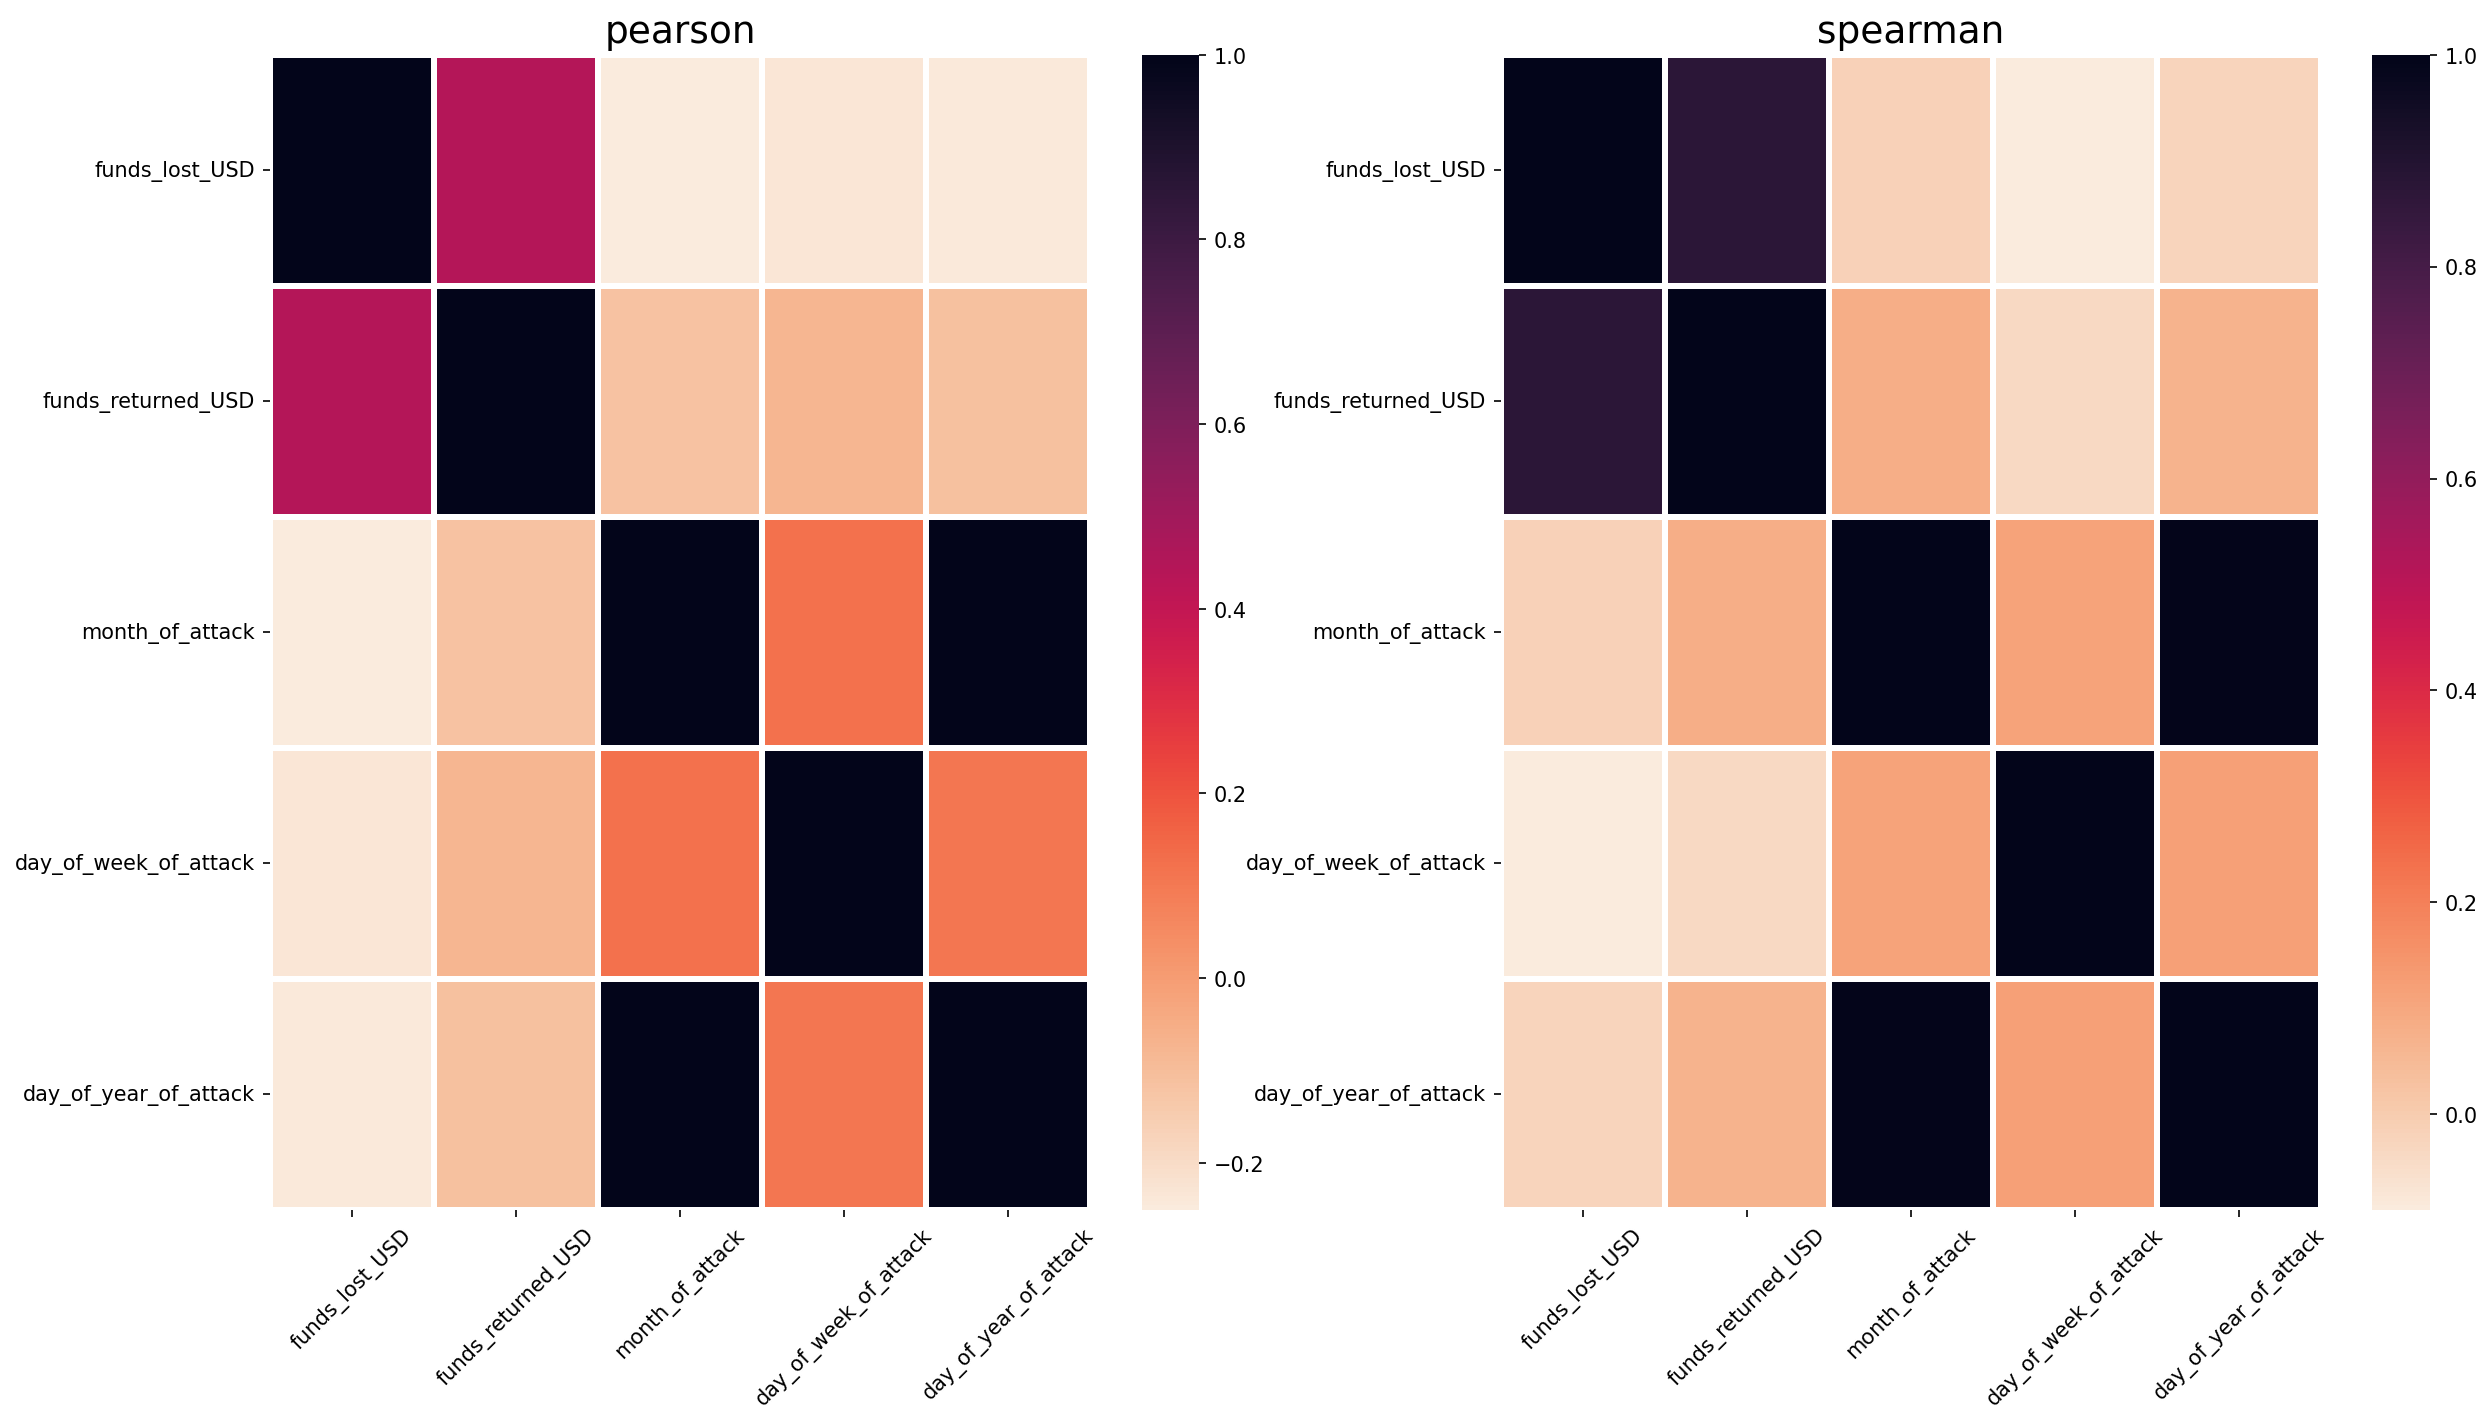

In [458]:
# plotting heatmap using Pearson Coeff, Kendall's Tau, and Spearman Coeff for all numerical variables
plt.figure(figsize=(30,10), dpi=150)
for j,i in enumerate(['pearson','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, cmap='rocket_r')
  plt.title(i, fontsize=18)
  plt.xticks(rotation=45)

* The Spearman correlation seems to have higher correlation values in same areas of the heatmap where they are less in the Pearson and Kendall correlations. 
*  Too many variables with insignificant correlation.
*  Major correlation lies between distance and trip duration variables, expectedly. **Hence, with these results, it would be more interesting to analyze correlations of numerical with categorical data.**

### Scatterplot


In [71]:
# Grouping variables
funds = ['funds_lost_USD','funds_returned_USD']
attack_dates = ['day_of_attack','month_of_attack', 'day_of_year_of_attack']

<Figure size 896x672 with 0 Axes>

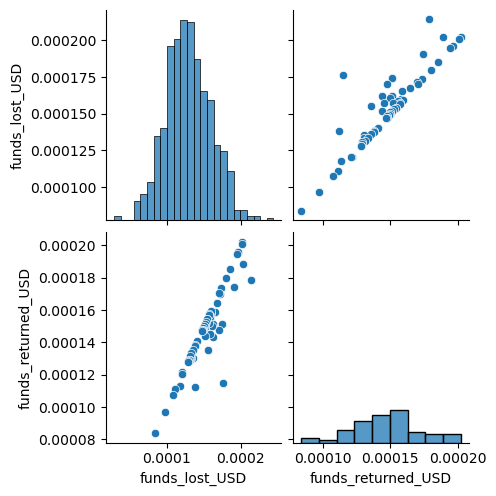

In [231]:
# scatter plot for funds variables
plt.figure(dpi=140)
sns.pairplot(numerical[funds])

**The scatter plot is is not meaningful due to the presence of outliers**

In [228]:
#taking log of every value and dividing by 100,000 to negate outliers
var = []
var.extend(funds)
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x)/100000)

In [ ]:
# scatter plot for funds variables
plt.figure(dpi=140)
sns.pairplot(numerical[funds])

<Figure size 896x672 with 0 Axes>

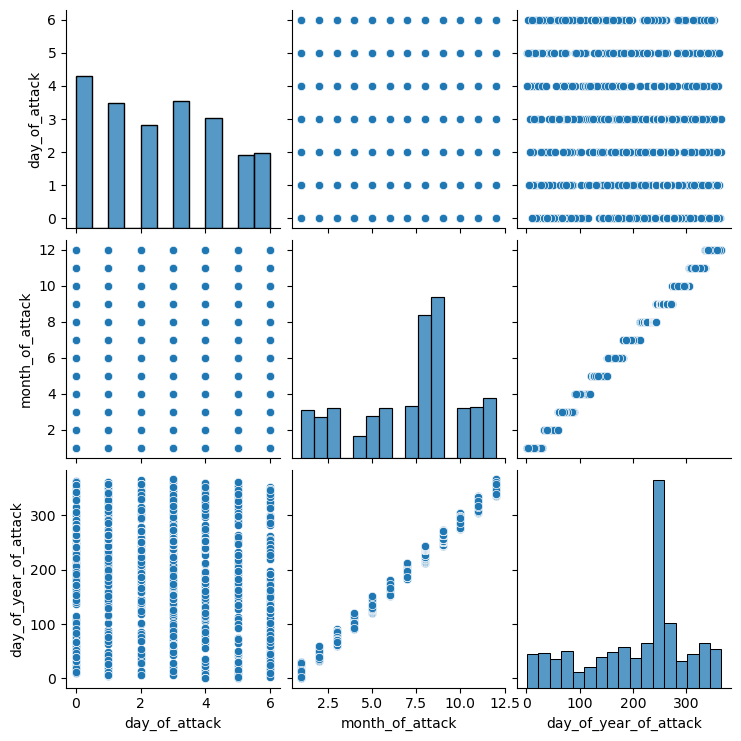

In [229]:
# scatter plot for pickup_dropoff_location variables
plt.figure(dpi=140)
sns.pairplot(numerical[attack_dates])

## Bivariate Analysis: Continuous-Categorical variables


**List of Hypotheses and investigation to perform under this combination.**

1.  Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to have higher trip durations?
2.  Is Vendor 1 less likely to deal with higher trip durations than Vendor 2 does?
3.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, experience higher trip duration?
4. Do taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel greater distances?
5. Does Vendor 2 deal with higher distances to travel than Vendor 1 does?
6. Do taxis that store and forward trips, because the vehicle did not have a connection to the server, travel greater distances?

In [234]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [235]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [236]:
def Bivariate_cont_cat_hypoth1(data, cont, cat):
  #creating 2 samples, passenger_counts <= 2 (x1) and 2 < passenger_counts < 7 (x2)
  x1 = data[cont][data[cat].isin([0,1,2])][:]
  x2 = data[cont][data[cat].isin([3,4,5,6])][:]
                  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot(['passenger_counts <= 2','2 < passenger_counts < 7'], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

### **1.  Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to have higher trip durations?**

In [237]:
Bivariate_cont_cat_hypoth1(REKT_df, 'funds_lost_USD', 'scam_type') 

ZeroDivisionError: float division by zero

**Inferences**

1.    Taxis carrying more than 2 but less than 7 passengers (to remove outlier passenger of 7 and 9) had higher trip durations, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly.

**Result**

We can confidently reject the null hypothesis that taxis with higher passenger_counts, greater than 2 passengers but less than 7 passengers, are less likely to have higher trip durations.

### **2.  Is Vendor 1 less likely to deal with higher trip durations than Vendor 2 does?**

In [84]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'2'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

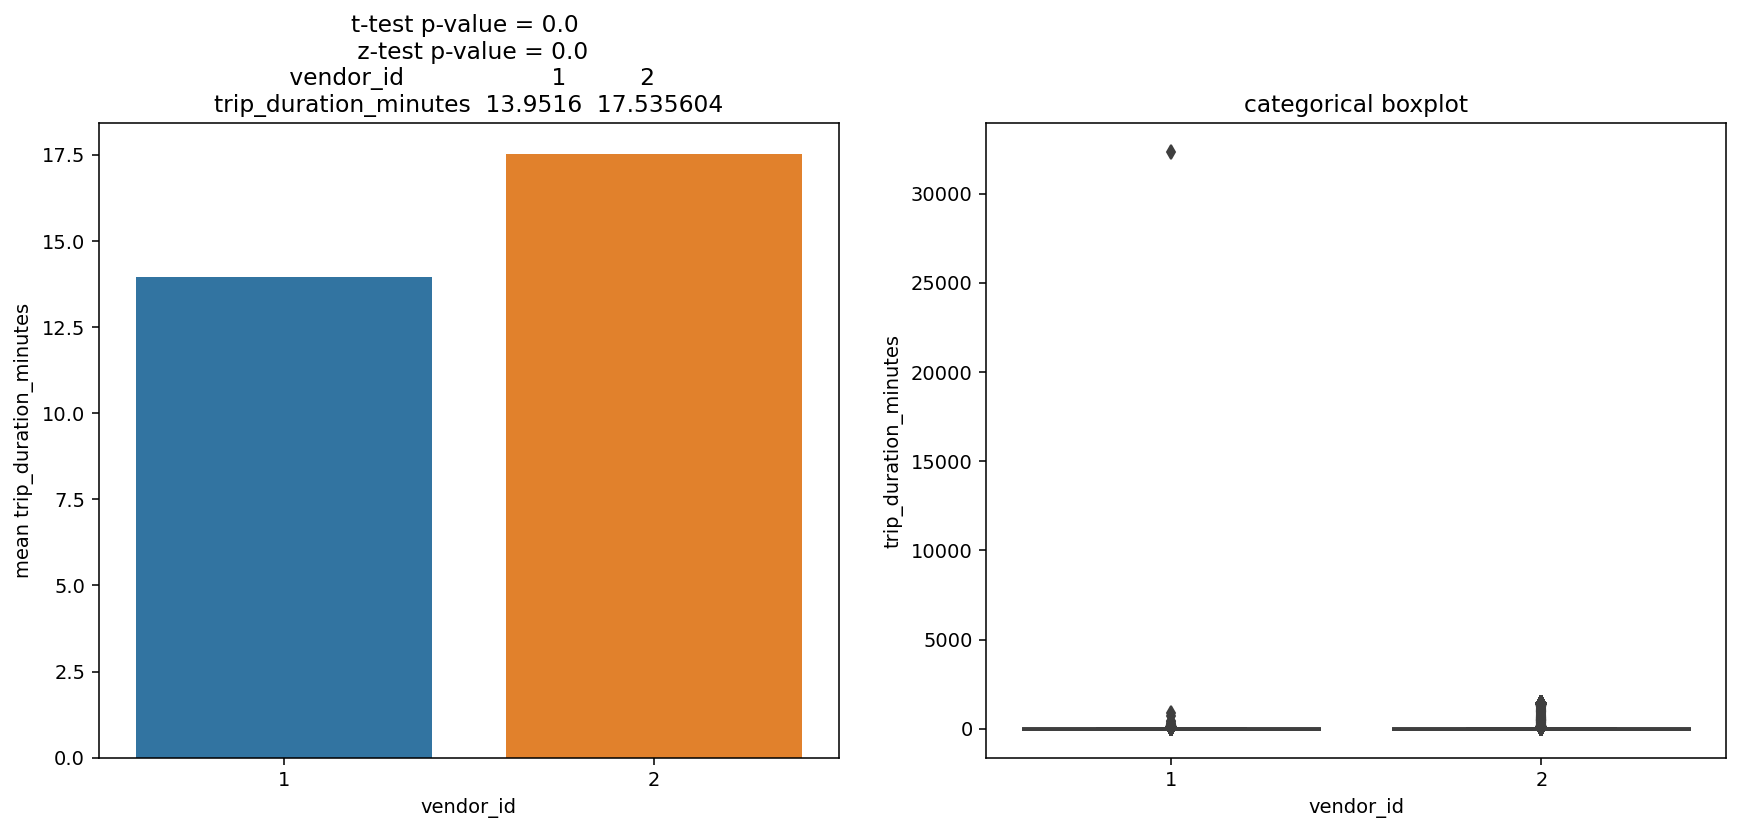

In [85]:
Bivariate_cont_cat(data, 'trip_duration_minutes', 'vendor_id', 1)

**Inferences**

1.    Taxis carrying more than 2 but less than 7 passengers (to remove outlier passenger of 7 and 9) had higher trip durations, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Boxplot shows a similar distribution, although with high outliers for vendor 1, and this further reinforces the above relation.

**Result**

We can confidently reject the null hypothesis that Vendor 1 is more likely to deal with higher trip durations than Vendor 2 does.

### **3.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, experience higher trip duration?**

In [86]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'N'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

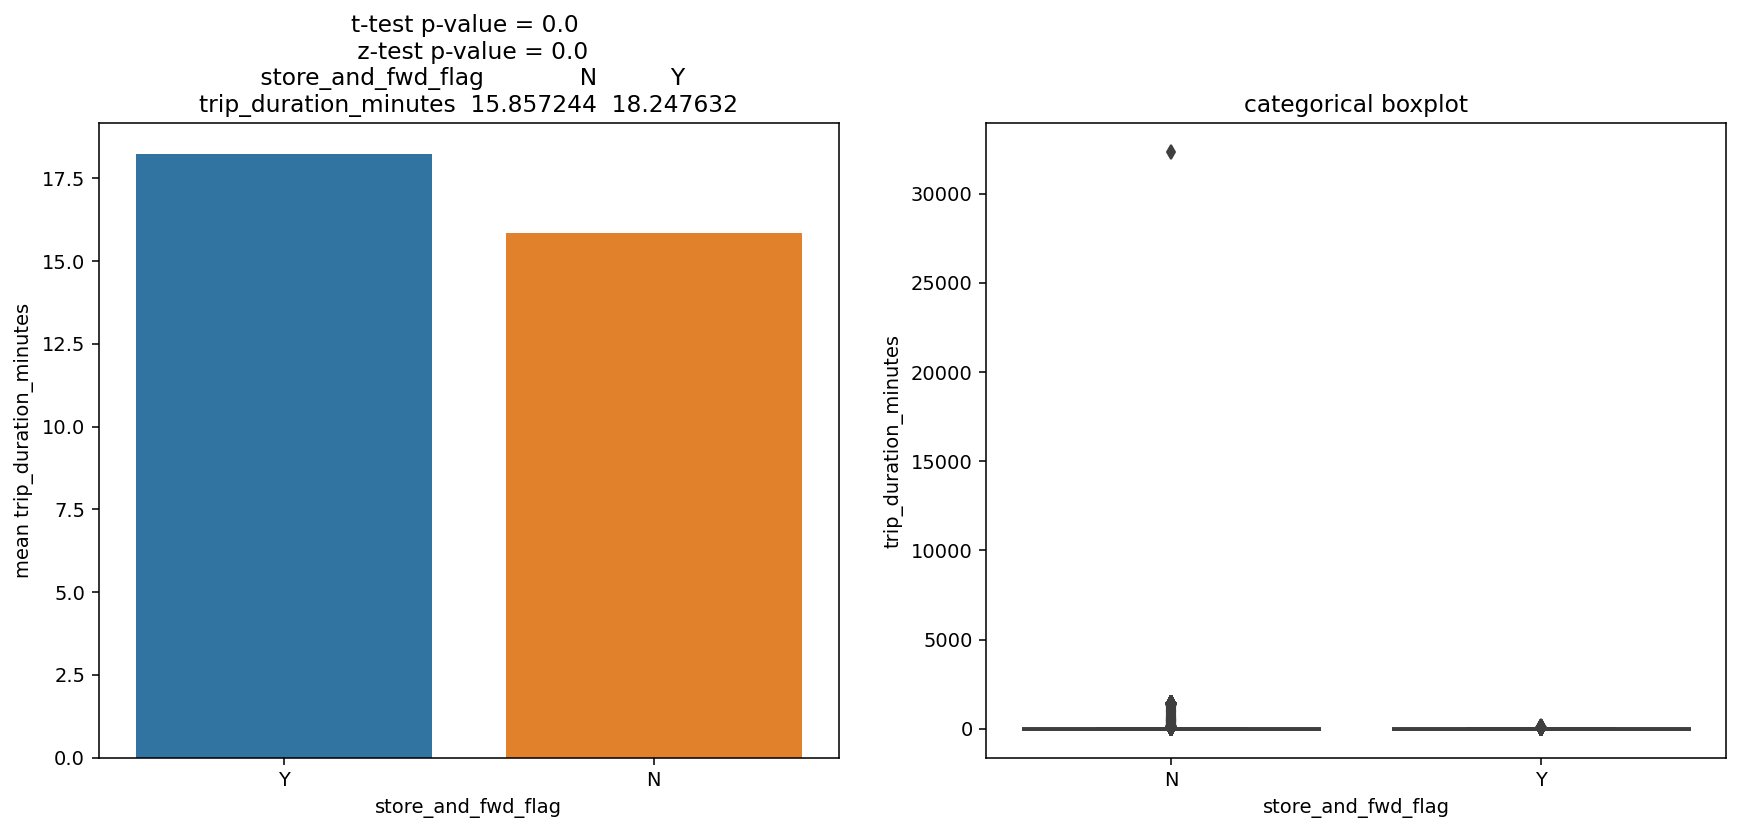

In [87]:
Bivariate_cont_cat(data, 'trip_duration_minutes', 'store_and_fwd_flag', 'Y')

**Inferences**

1.    Taxis that store and forward trips, because the vehicle did not have a connection to the server, did experience higher trip duration, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers in the taxis that did NOT store and forward trips, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly. 

**Result**

We can confidently reject the null hypothesis that taxis that store and forward trips, because the vehicle did not have a connection to the server, experience lower trip duration.

### **4.  Do taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel greater distances?**

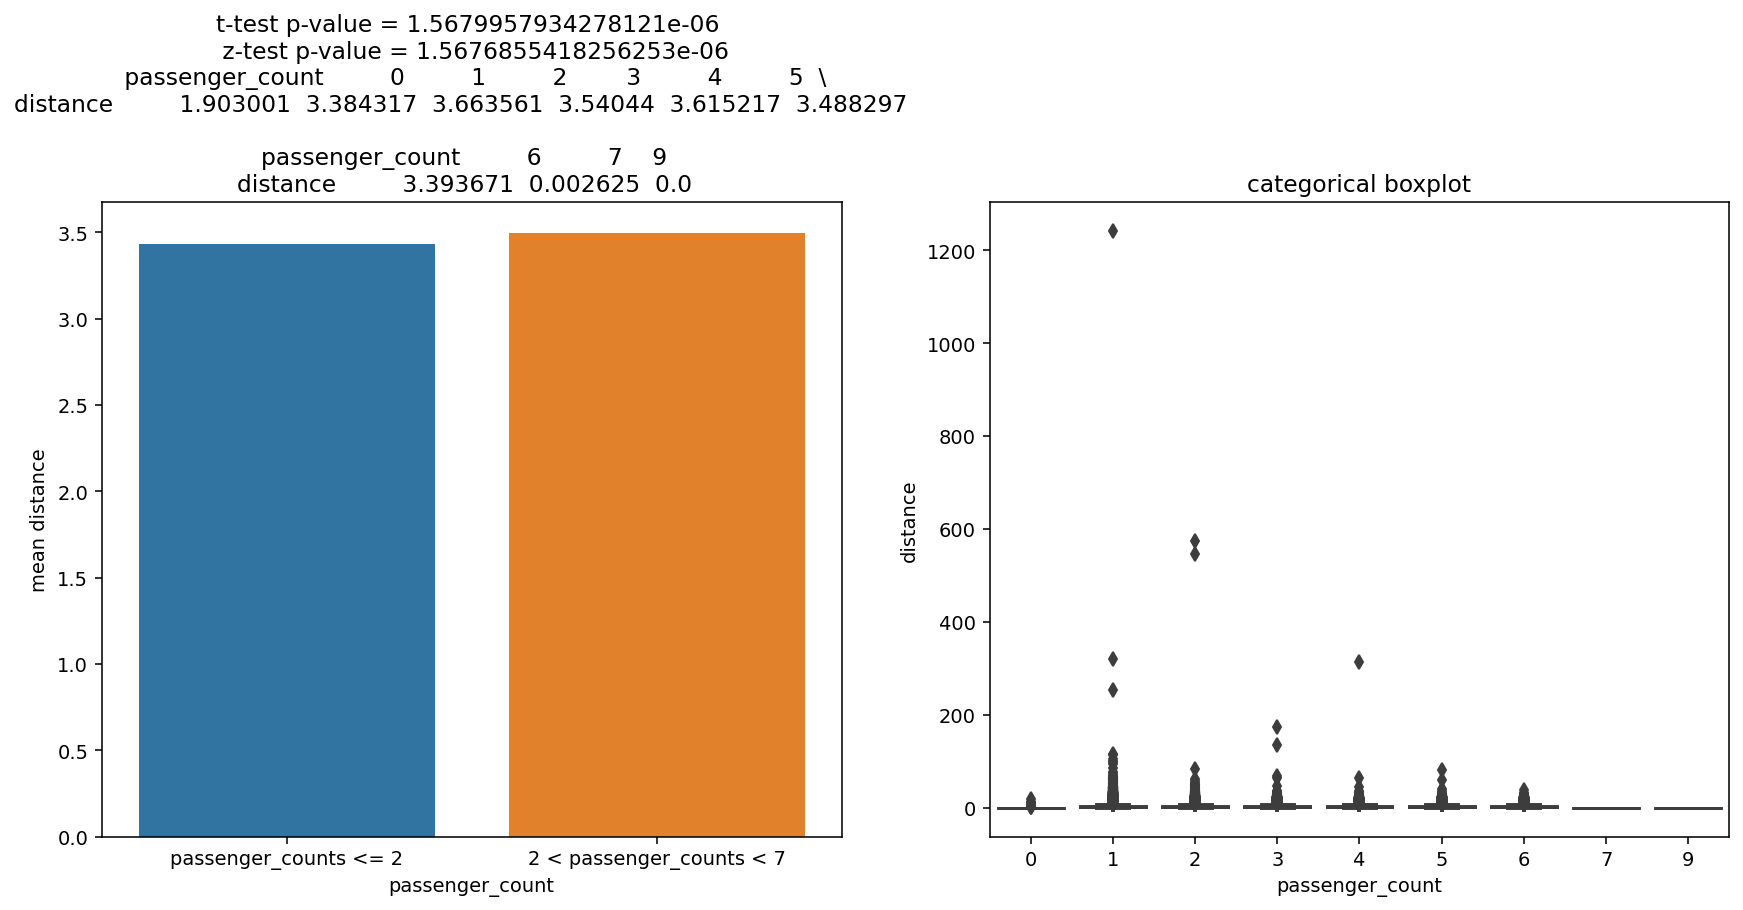

In [88]:
Bivariate_cont_cat_hypoth1(data, 'distance', 'passenger_count') 

**Inferences**

1.    Although taxis with higher passenger_counts, greater than 2 but less than 7 passengers, do travel greater distances as seen in the barplot, the p-value results are insignificant, as p-value > 0.05. 
2.    Although the boxplot represents that there are significant outliers for passenger_count 1 and 2, the distances travelled by those taxis are still a little less than their counterpart. 

**Result**

We cannot reject the null hypothesis that taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel less distances.

### **5.  Does Vendor 2 deal with higher distances to travel than Vendor 1 does?**

In [89]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'2'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

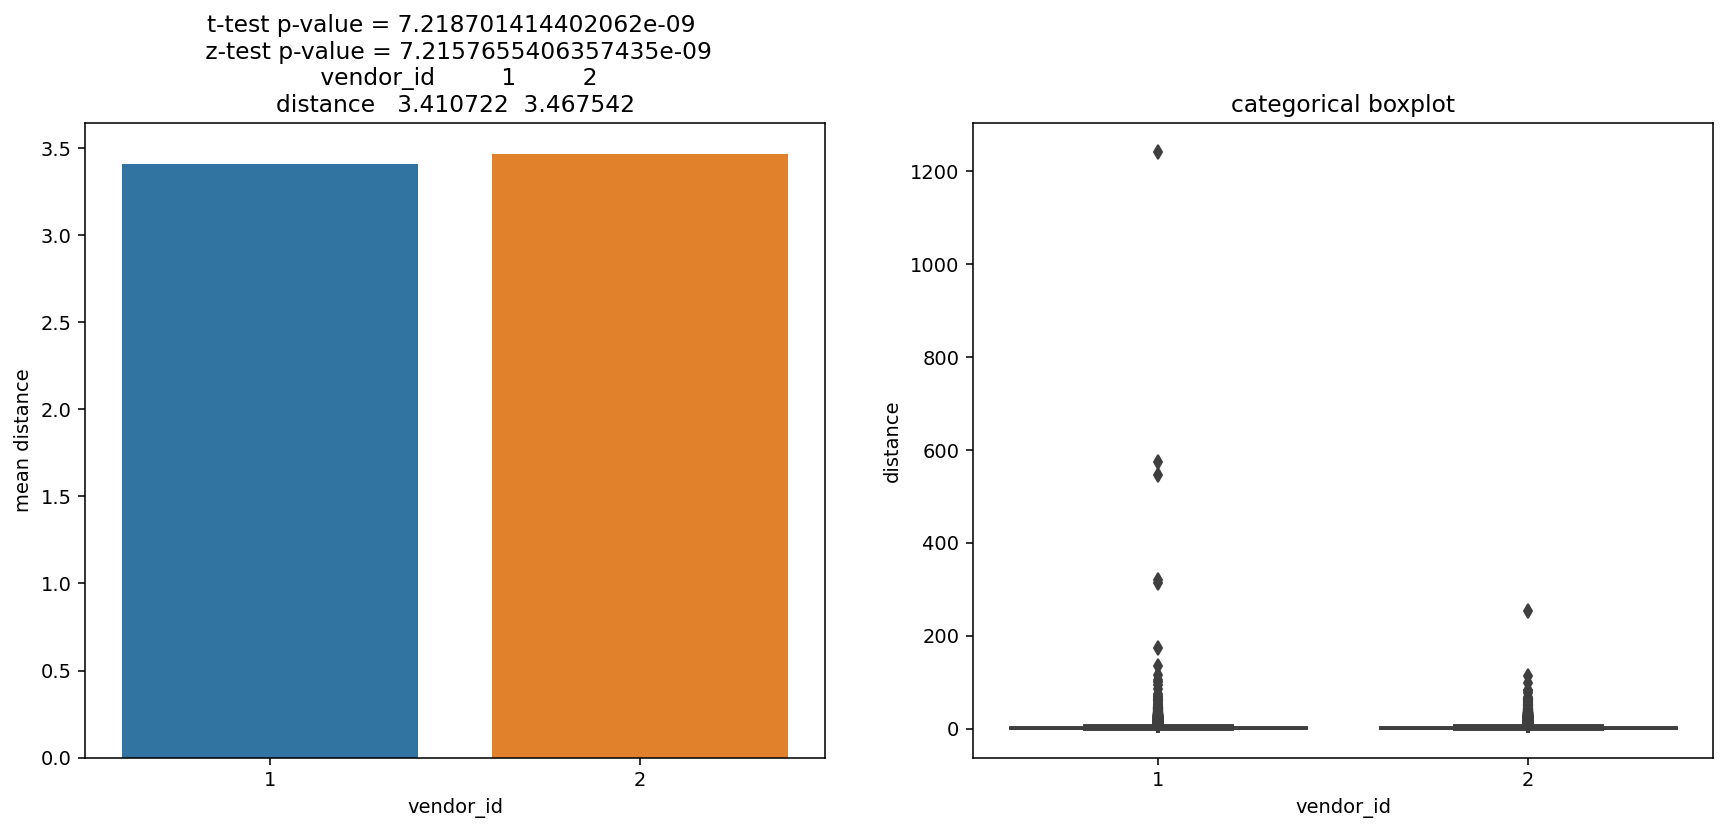

In [90]:
Bivariate_cont_cat(data, 'distance', 'vendor_id', 1)

**Inferences**

1.    Although Vendor 2 deals with higher distances to travel than Vendor 1 does as seen in the barplot and mean distance values, the p-value results are insignificant, as p-value > 0.05. 
2.    The boxplot represents that there are significant outliers for vendor 1, but lesser for vendor 2

**Result**

We cannot reject the null hypothesis that Vendor 2 deals with lower distances, on average, to travel than Vendor 1 does.

### **6.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, travel greater distances?**

In [91]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'N'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

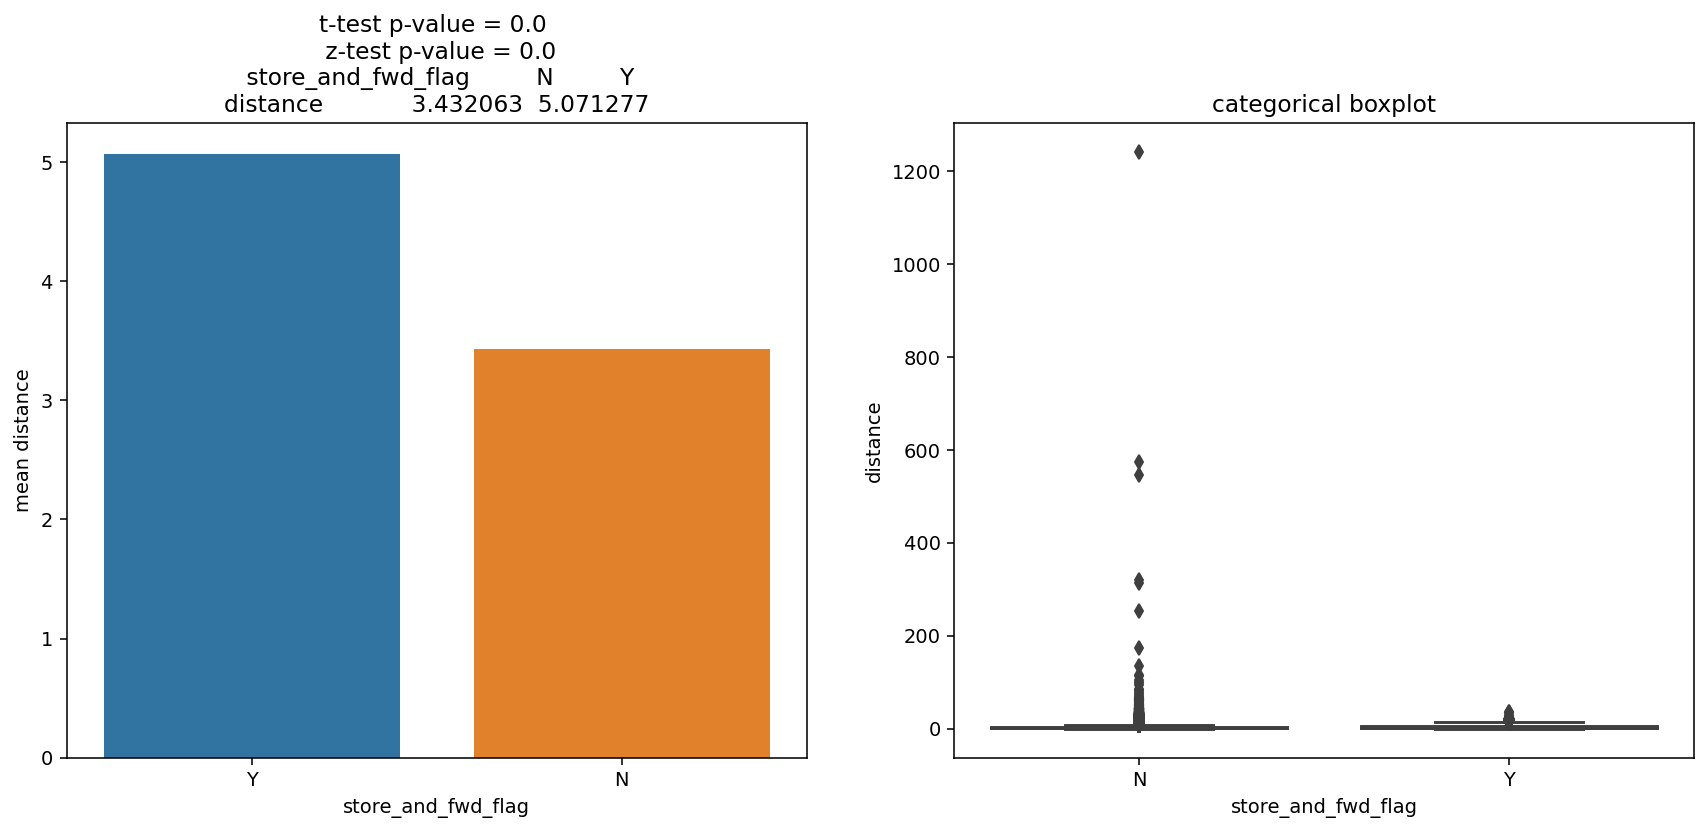

In [92]:
Bivariate_cont_cat(data, 'distance', 'store_and_fwd_flag', 'Y')

**Inferences**

1.    Taxis that store and forward trips, because the vehicle did not have a connection to the server, did significantly travel higher distances, as seen in the barplot, because p-value < 0.05. Results of the pivot table for  mean distance of taxis that store and forward trips are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers in the taxis that did NOT store and forward trips, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly. 

**Result**

We can confidently reject the null hypothesis that taxis that store and forward trips, because the vehicle did not have a connection to the server, did not travel greater distances.

## Bivariate : Categorical-Categorical

In [93]:
data.dtypes[data.dtypes == 'category']

id                    category
vendor_id             category
passenger_count       category
store_and_fwd_flag    category
dtype: object

#### List of Hypotheses to check under this combination
1.   Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to belong to Vendor 2?
2.   Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to store and forward trips, because the vehicle did not have a connection to the server?
3.   Does Vendor 2 deal with trips that are more likely to store and forward trips, because the vehicle did not have a connection to the server?

In [94]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

### 1.  Are taxis with higher passenger_count, greater than 2 but less than 7 passengers, more likely to belong to  Vendor 2?


In [95]:
# converting passenger_count to integer first, segregating customers into segments, removing passenger_count_group values of 'str'
data['passenger_count'] = data['passenger_count'].astype('int64')
vendor = data[['passenger_count','vendor_id']][:]
vendor['passenger_count_group'] = 'str'
vendor['passenger_count_group'][vendor['passenger_count']<=2] = 'low passenger count'
vendor['passenger_count_group'][(vendor['passenger_count']>2) & (vendor['passenger_count']<7)] = 'high passenger count'
vendor = vendor[vendor.passenger_count_group != 'str']


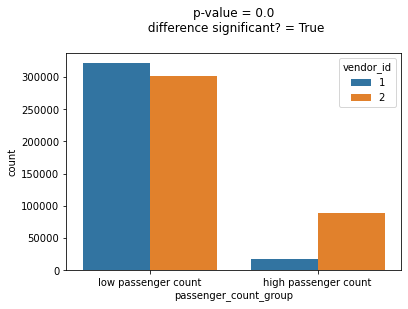

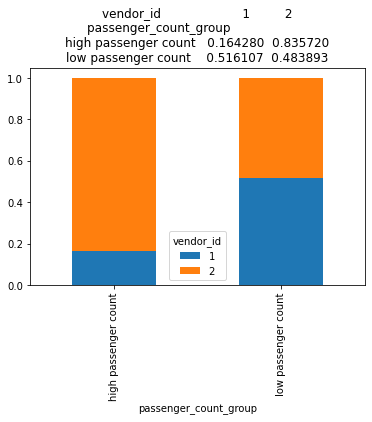

In [96]:
BVA_categorical_plot(vendor, 'vendor_id', 'passenger_count_group')

**Result**: Number of passengers in a taxi on a certain trip has a significant effect on which type of vendor they will ride with. Hence, we can reject the null hypothesis that taxis with higher passenger_count, greater than 2 but less than 7 passengers, are less likely to belong to Vendor 2.

### 2. Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to store and forward trips, because the vehicle did not have a connection to the server?

In [97]:
# converting passenger_count to integer first, segregating customers into segments, removing passenger_count_group values of 'str'
data['passenger_count'] = data['passenger_count'].astype('int64')
store_forward = data[['passenger_count','store_and_fwd_flag']][:]
store_forward['passenger_count_group'] = 'str'
store_forward['passenger_count_group'][store_forward['passenger_count']<=2] = 'low passenger count'
store_forward['passenger_count_group'][(store_forward['passenger_count']>2) & (store_forward['passenger_count']<7)] = 'high passenger count'
store_forward = store_forward[store_forward.passenger_count_group != 'str']


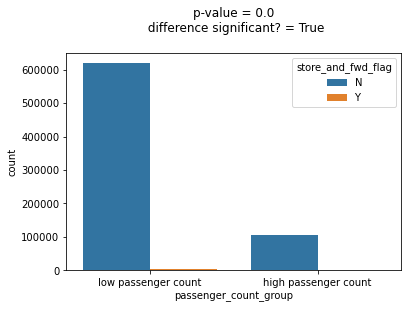

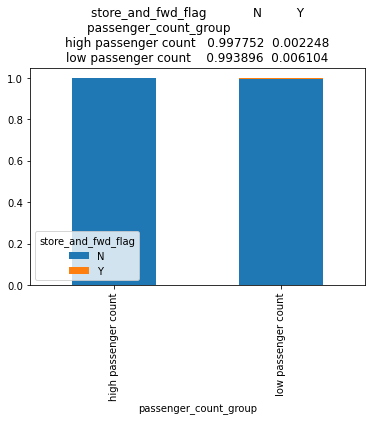

In [98]:
BVA_categorical_plot(store_forward, 'store_and_fwd_flag', 'passenger_count_group')

**Result**: Number of passengers in a taxi on a certain trip has a significant effect on whether the trip record was held in-vehicle memory before sending to the vendor. Hence, we cannot reject the null hypothesis that taxis with higher passenger_count, greater than 2 but less than 7 passengers, are less likely to store and forward trips, because the vehicle did not have a connection to the server

### 3. Does Vendor 2 deal with trips that are more likely to store and forward trips, because the vehicle did not have a connection to the server?

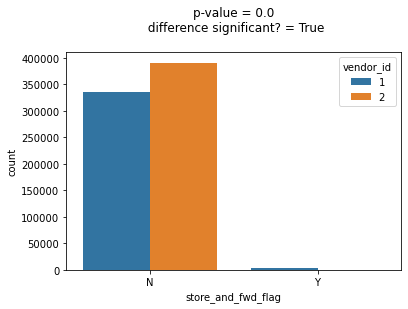

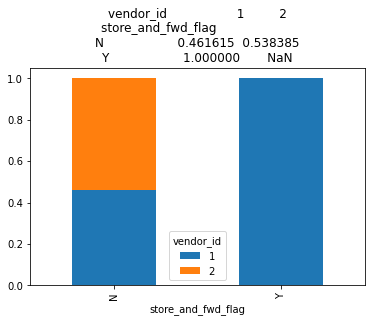

In [99]:
BVA_categorical_plot(data, 'vendor_id', 'store_and_fwd_flag')

# Multivariate Analysis

## Box Plot

We are using a grouped boxplot to comply with the objective of determining the trip_duration using various categorical features. We'll use vendor_id, passenger_count, and store_and_fwd_flag categorical features and derive insights from the boxplots.

In [238]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')